# Exercise 5 : Classification Tree

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Setup : Import the Dataset

Dataset from Kaggle : The **"House Prices"** competition     
Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The dataset is `train.csv`; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [3]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---

## Problem 1 : Predicting CentralAir using SalePrice

Explore the variable `CentralAir` from the dataset, as mentioned in the problem.     

In [4]:
houseData['CentralAir'].describe()

count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object

Check the `catplot` for `CentralAir`, to visually understand the distribution.

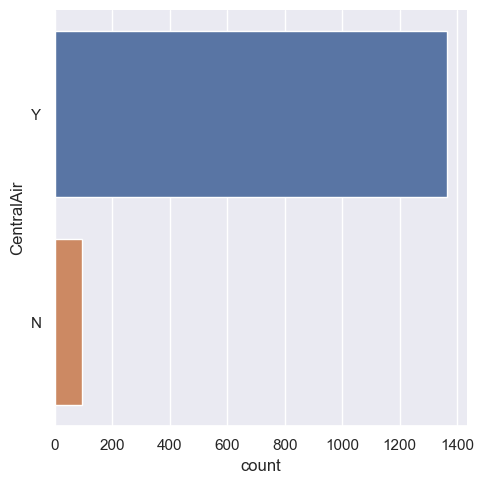

In [5]:
sb.catplot(y = 'CentralAir', data = houseData, kind = "count")

Print the ratio `Y` : `N` for `CentralAir` to check the imbalance in the classes.

In [6]:
countY, countX = houseData.CentralAir.value_counts()
print("Ratio of classes is Y : N = ", countY, ":", countX)

Ratio of classes is Y : N =  1365 : 95


**Note :** Yes, I know. You do not have to check the above for this exercise. However, when you are doing classification for binary or multi-class categorical variables, it is a good practice to check the initial distribution of the response variable to identify if there is "class imbalance". In practice, we would like to fix this imbalance before attempting classification or keep the imbalance in consideration during the classification. I am not fixing imbalance as of now.     

Extra resource : https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

Plot `CentralAir` against `SalePrice` to visualize their mutual relationship.

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

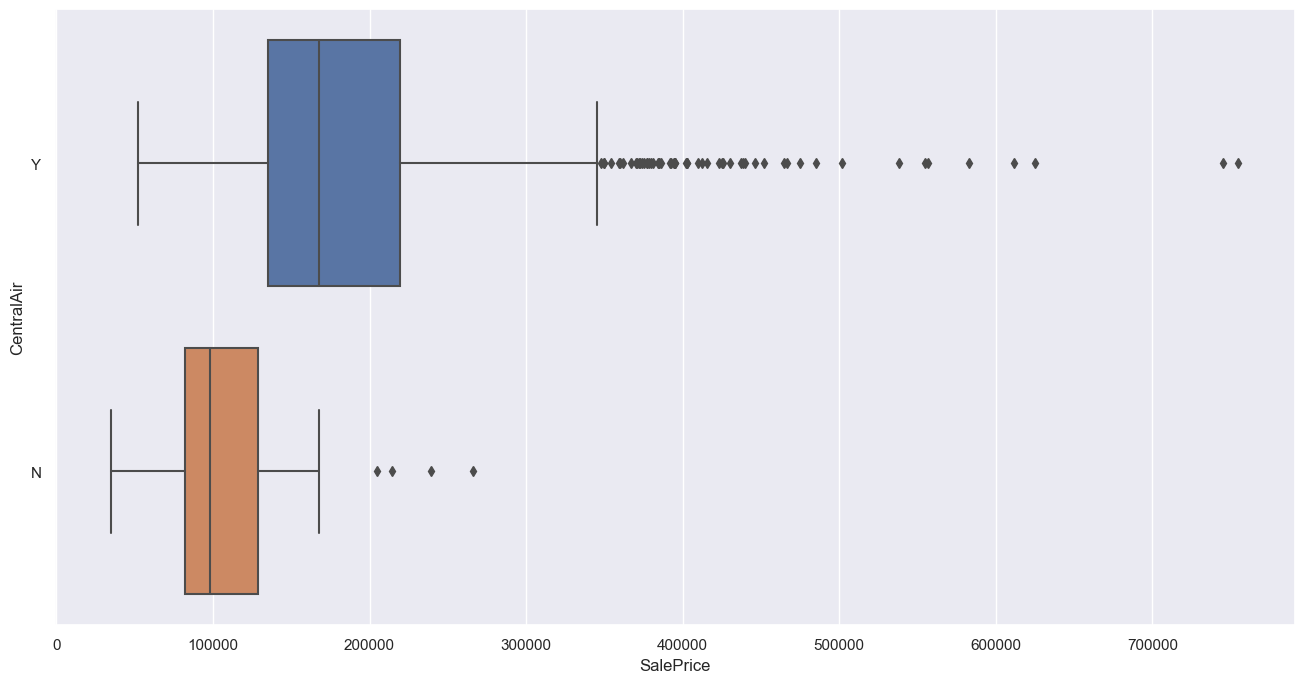

In [7]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'SalePrice', y = 'CentralAir', data = houseData)

Good to note that the two boxplots for `SalePrice`, for `CentralAir = Y` and `CentralAir = N`, are different from one another in terms of their median value, as well as spread. This means that `CentralAir` has an effect on `SalePrice`, and hence, `SalePrice` will probably be an important variable in predicting `CentralAir`. Boxplots do not tell us where to make the cuts though -- it will be easier to visualize in the following `swarmplot`.

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


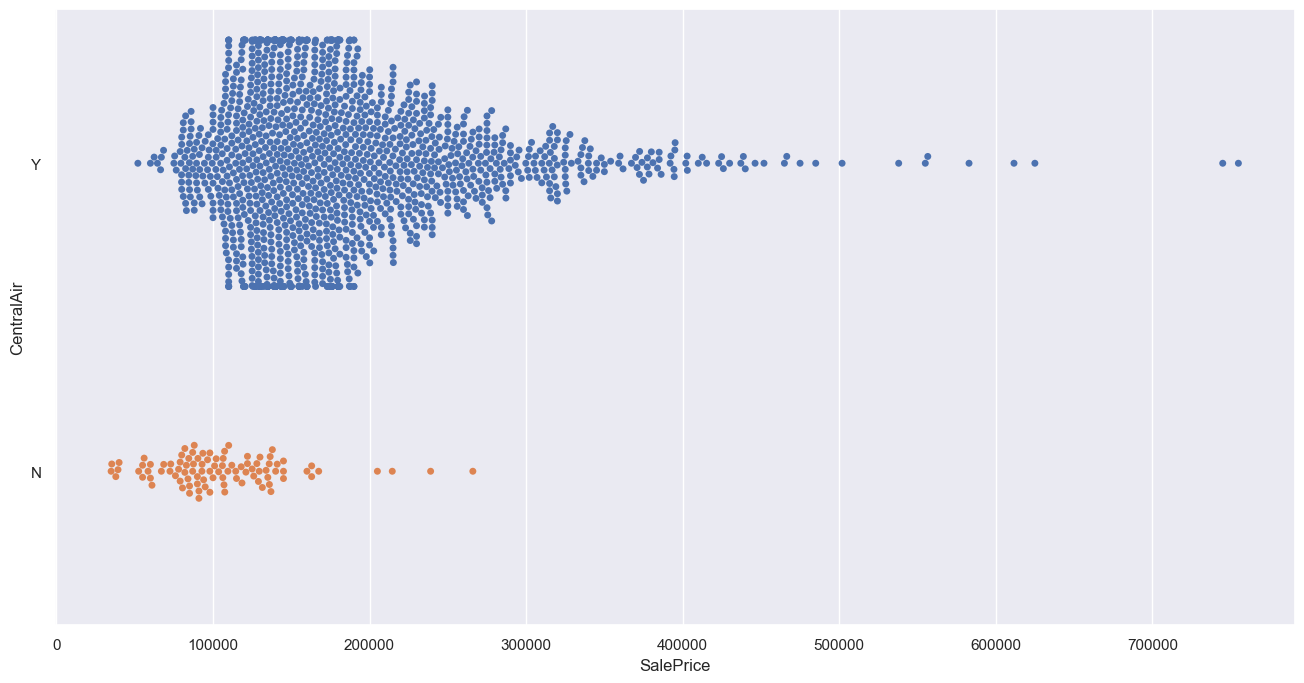

In [9]:
f = plt.figure(figsize=(16, 8))
sb.swarmplot(x = 'SalePrice', y = 'CentralAir', data = houseData)
plt.show()

Hmm, it seems that swarmplot asks you to decrease the size of the markers or use `stripplot`. What is this `stripplot` anyway? Let's check.

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

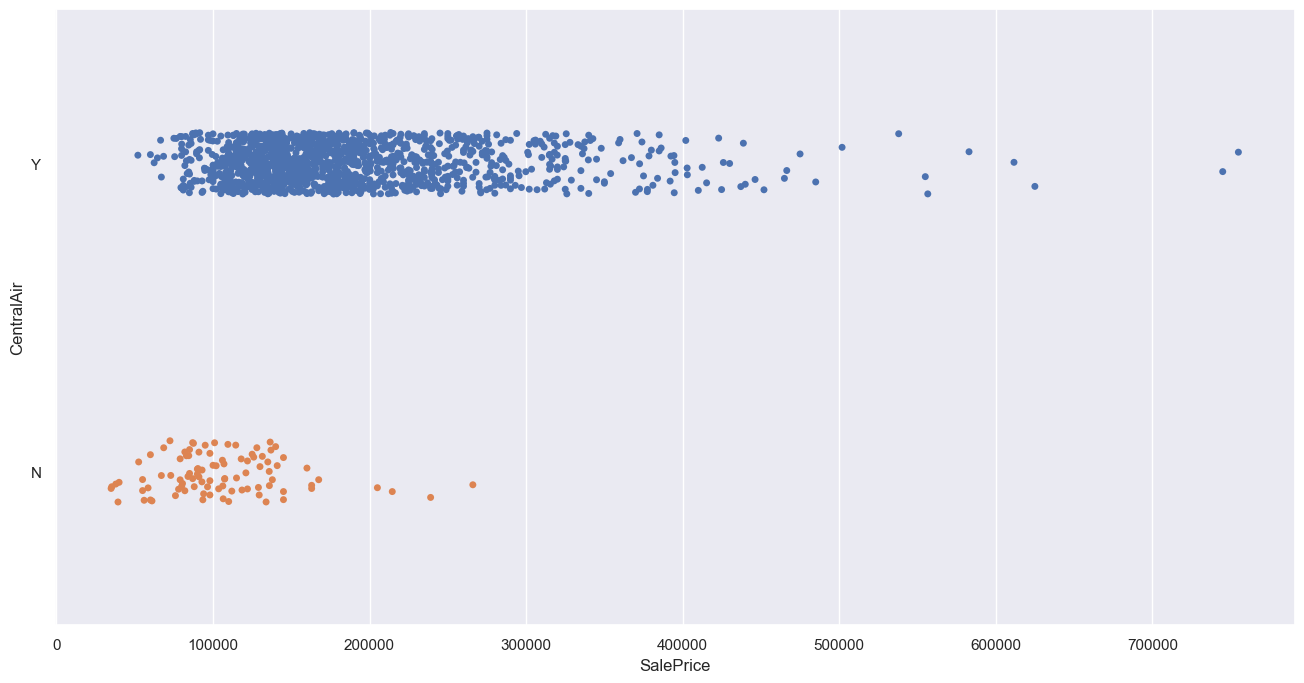

In [10]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'SalePrice', y = 'CentralAir', data = houseData)

Now it's time to build the Decision Tree classifier. Import the `DecisionTreeClassifier` model from `sklearn.tree`.

In [11]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
# you can change the max_depth as you wish

# Decision Tree with max depth = 2
tree_CA_SP_d2 = DecisionTreeClassifier(max_depth = 2)

# Decision Tree with max depth = 4
tree_CA_SP_d4 = DecisionTreeClassifier(max_depth = 4)

*Note the names of the two trees as you create them. We will have to continue calling the two trees by their distinct names throughout the exercise.*

Split the dataset in Train and Test sets, uniformly at random.   
Train Set with 80% of data and Test Set with 20% of data.     

In [12]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['CentralAir'])
X = pd.DataFrame(houseData['SalePrice'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


Fit Decision Tree Classifier models on the Train Dataset.   

In [13]:
# Fit the tree with max depth 2
tree_CA_SP_d2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [14]:
# Fit the tree with max depth 4
tree_CA_SP_d4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

#### Visual Representation of the Decision Tree Model

[Text(0.5, 0.8333333333333334, 'SalePrice <= 107750.0\ngini = 0.105\nsamples = 1168\nvalue = [65, 1103]\nclass = Y'),
 Text(0.25, 0.5, 'SalePrice <= 61191.5\ngini = 0.429\nsamples = 119\nvalue = [37, 82]\nclass = Y'),
 Text(0.125, 0.16666666666666666, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = N'),
 Text(0.375, 0.16666666666666666, 'gini = 0.4\nsamples = 112\nvalue = [31, 81]\nclass = Y'),
 Text(0.75, 0.5, 'SalePrice <= 145125.0\ngini = 0.052\nsamples = 1049\nvalue = [28, 1021]\nclass = Y'),
 Text(0.625, 0.16666666666666666, 'gini = 0.126\nsamples = 339\nvalue = [23, 316]\nclass = Y'),
 Text(0.875, 0.16666666666666666, 'gini = 0.014\nsamples = 710\nvalue = [5, 705]\nclass = Y')]

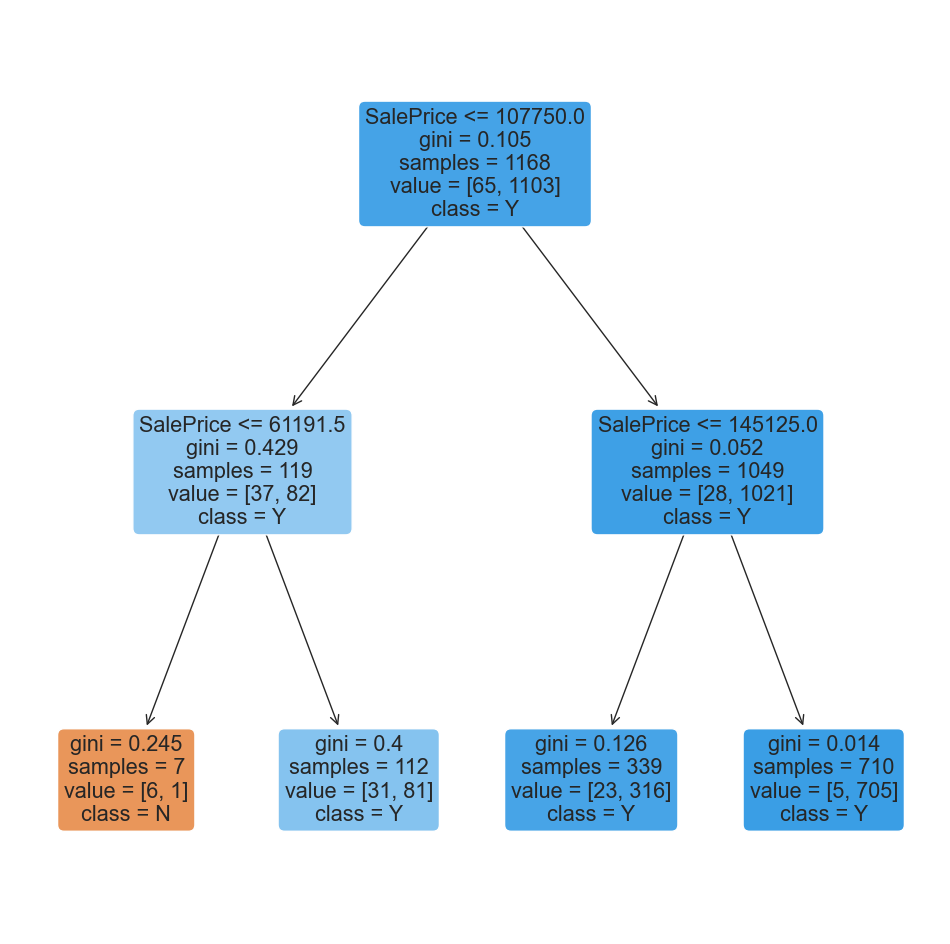

In [16]:
# Plot the tree with max depth 2
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(tree_CA_SP_d2, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

[Text(0.5125, 0.9, 'SalePrice <= 107750.0\ngini = 0.105\nsamples = 1168\nvalue = [65, 1103]\nclass = Y'),
 Text(0.225, 0.7, 'SalePrice <= 61191.5\ngini = 0.429\nsamples = 119\nvalue = [37, 82]\nclass = Y'),
 Text(0.1, 0.5, 'SalePrice <= 59250.0\ngini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = N'),
 Text(0.05, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = N'),
 Text(0.15, 0.3, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = N'),
 Text(0.35, 0.5, 'SalePrice <= 105950.0\ngini = 0.4\nsamples = 112\nvalue = [31, 81]\nclass = Y'),
 Text(0.25, 0.3, 'SalePrice <= 103800.0\ngini = 0.375\nsamples = 100\nvalue = [25, 75]\nclass = Y'),
 Text(0.2, 0.1, 'gini = 0.401\nsamples = 90\nvalue = [25, 65]\nclass = Y'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = Y'),
 Text(0.45, 0.3, 'SalePrice <= 106375.0\ngini = 0.5\nsamples = 12\nvalue = [6, 6]\nclass = N'),
 Text(0.4, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = N'),
 Text(0.5, 0.1, 'gini = 0.494\nsam

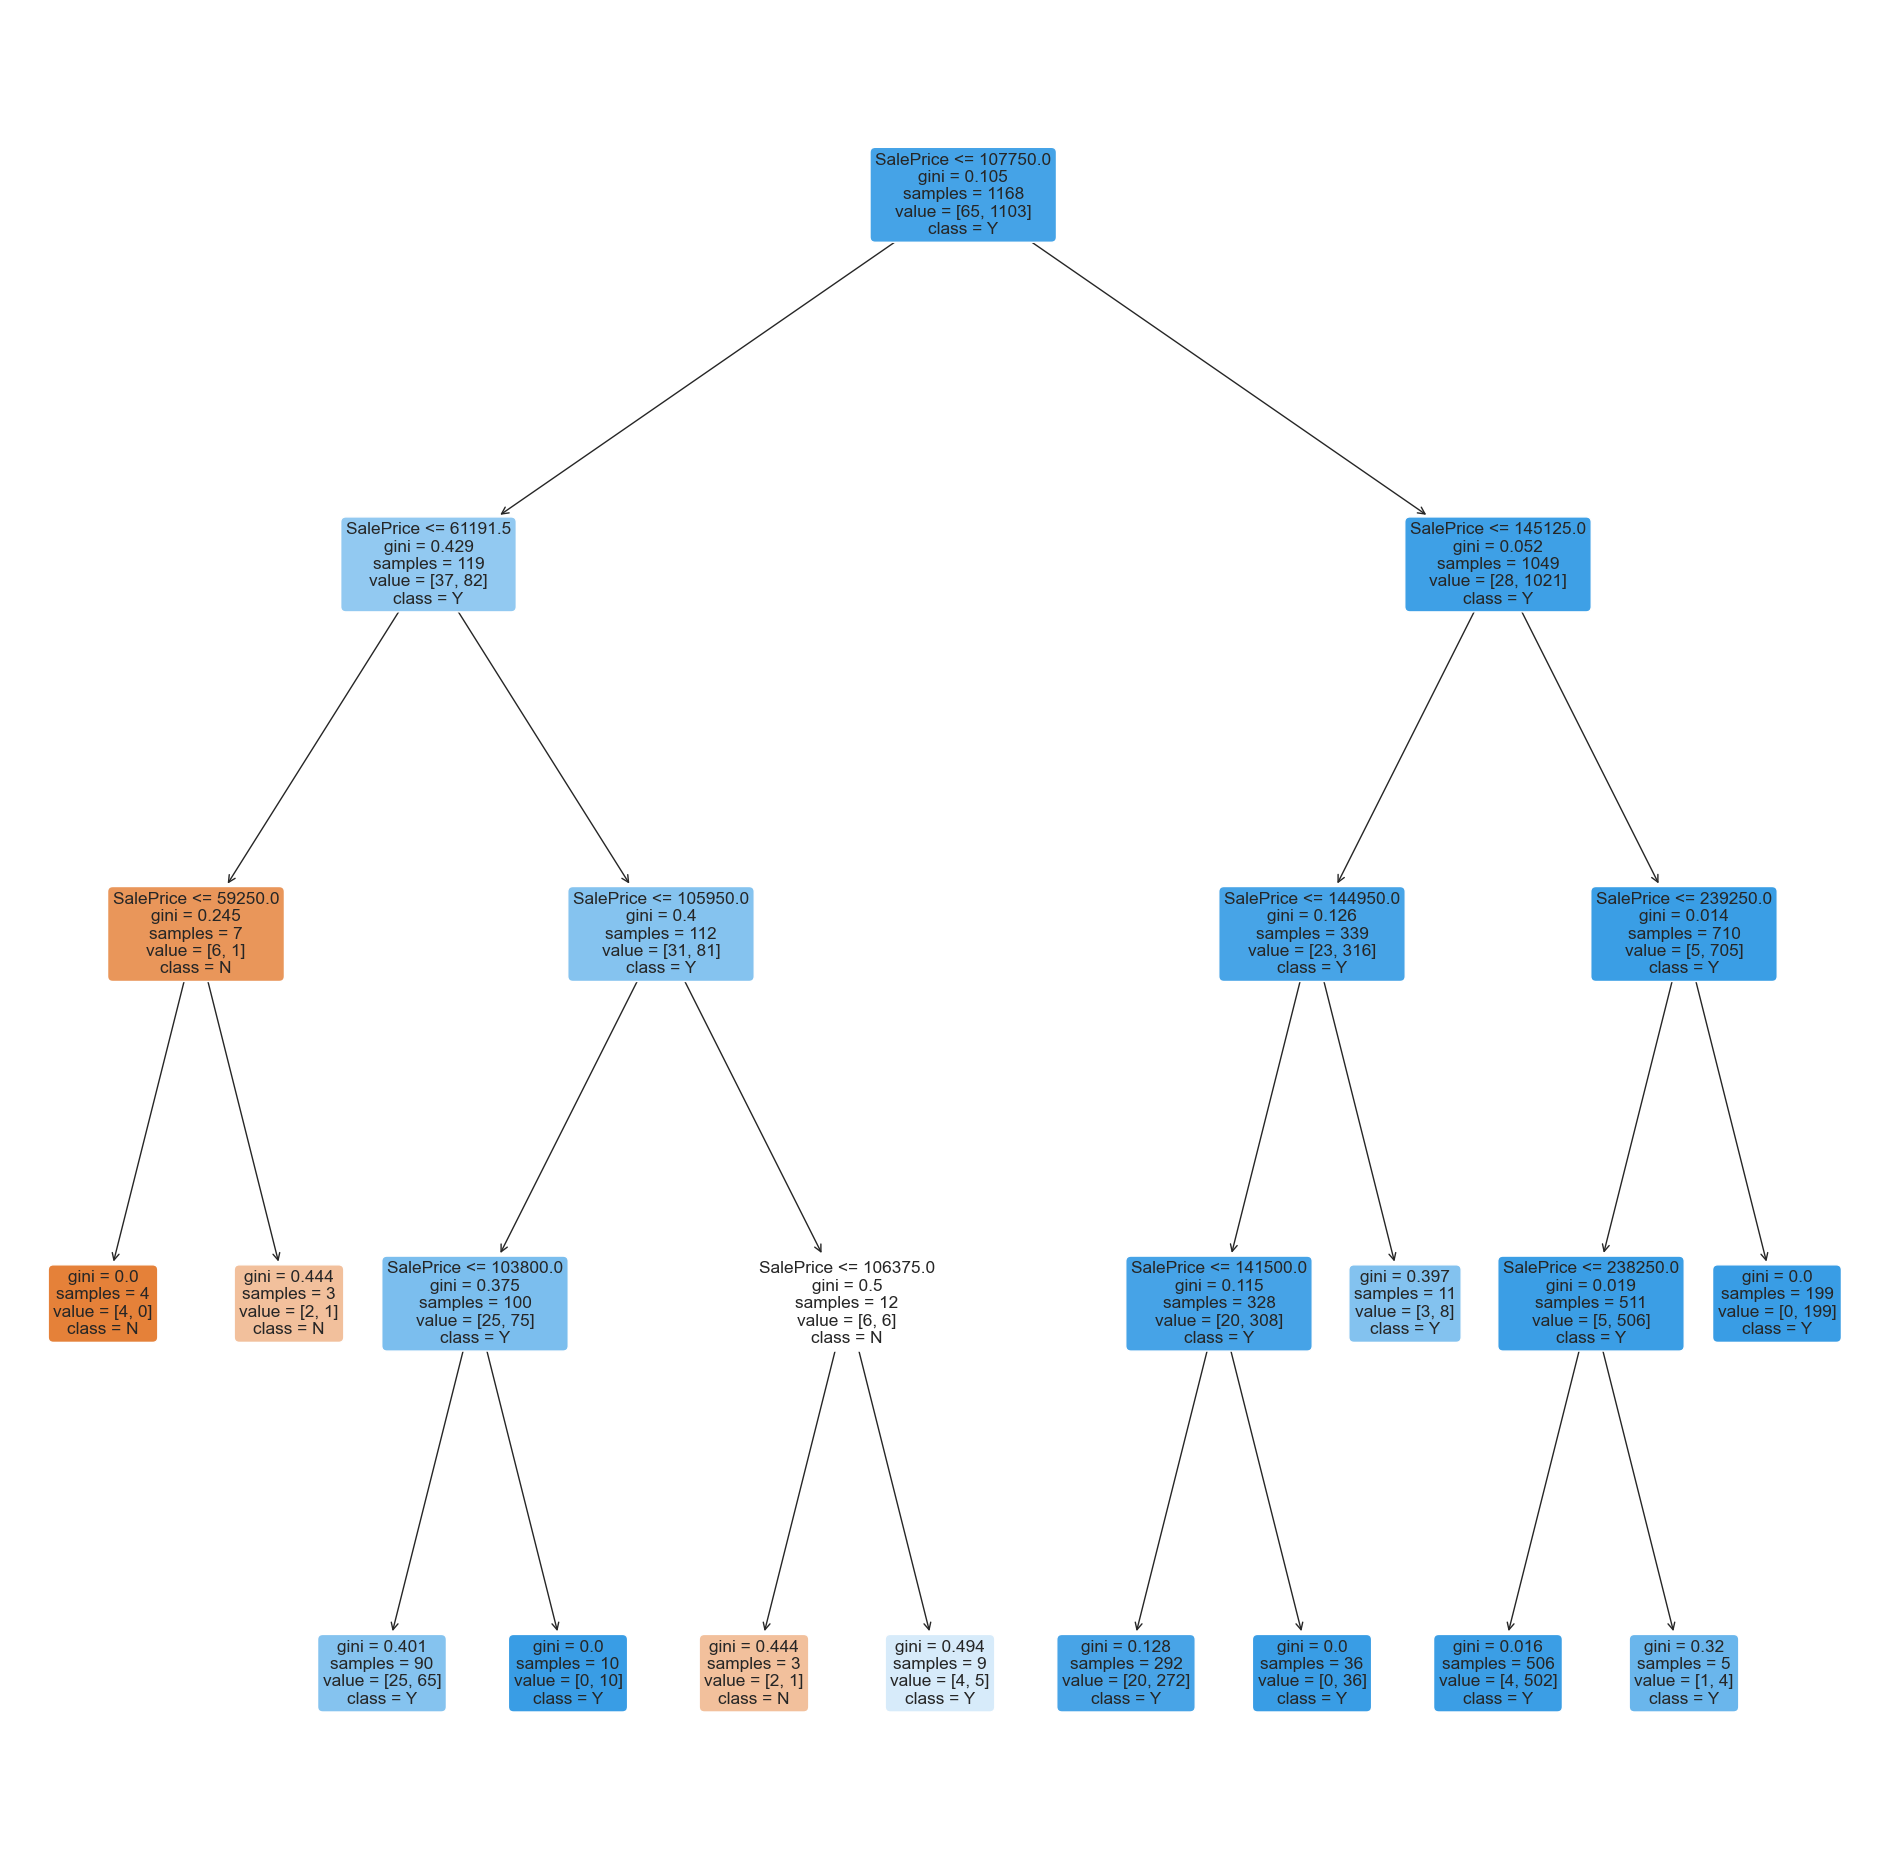

In [17]:
# Plot the tree with max depth 4
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(tree_CA_SP_d4, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

#### Prediction on Train Data and Goodness of Fit

Check how good the predictions are on the Train Set.    
Metrics : Classification Accuracy and Confusion Matrix.     

**Let's try with the tree with max depth 2 first.**      
Be careful in using the correct name of the tree.

<AxesSubplot:>

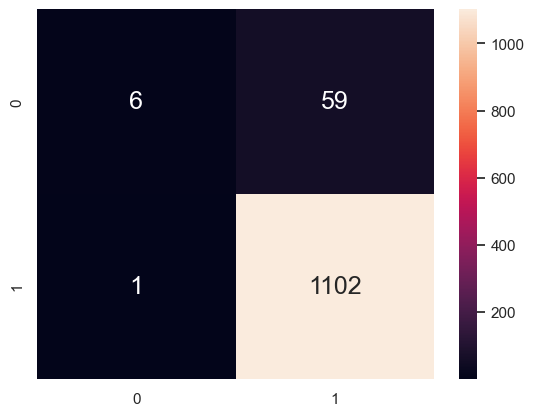

In [18]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = tree_CA_SP_d2.predict(X_train)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

In [19]:
# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", tree_CA_SP_d2.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Train Data
Accuracy  :	 0.9486301369863014

TPR Train :	 0.99909338168631
TNR Train :	 0.09230769230769231

FPR Train :	 0.9076923076923077
FNR Train :	 0.0009066183136899365


**Let's try with the tree with max depth 4 next.**      
Be careful in using the correct name of the tree.

<AxesSubplot:>

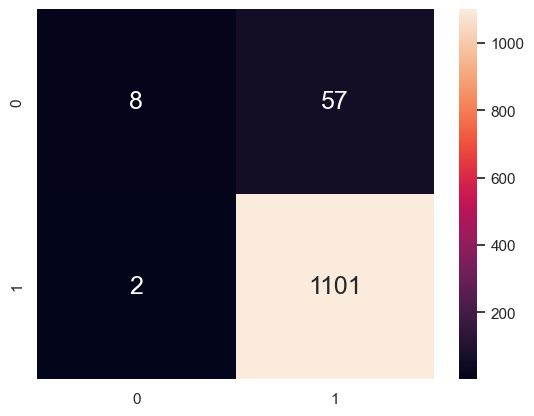

In [20]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = tree_CA_SP_d4.predict(X_train)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

In [21]:
# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", tree_CA_SP_d4.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Train Data
Accuracy  :	 0.949486301369863

TPR Train :	 0.9981867633726201
TNR Train :	 0.12307692307692308

FPR Train :	 0.8769230769230769
FNR Train :	 0.001813236627379873


#### Prediction on Test Data and Goodness of Fit

Check how good the predictions are on the Test Set.    
Metrics : Classification Accuracy and Confusion Matrix.     

**Let's try with the tree with max depth 2 first.**      
Be careful in using the correct name of the tree.

<AxesSubplot:>

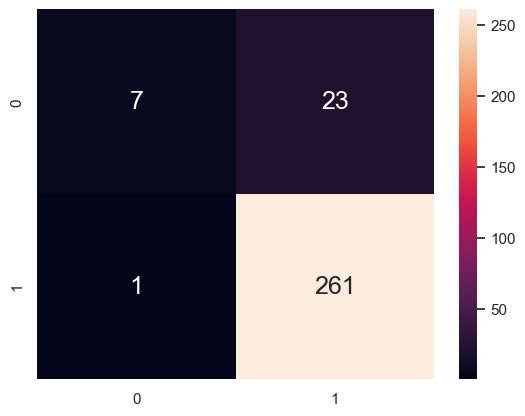

In [22]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = tree_CA_SP_d2.predict(X_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

In [23]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", tree_CA_SP_d2.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.9178082191780822

TPR Test :	 0.9961832061068703
TNR Test :	 0.23333333333333334

FPR Test :	 0.7666666666666667
FNR Test :	 0.003816793893129771


**Let's try with the tree with max depth 4 next.**      
Be careful in using the correct name of the tree.

<AxesSubplot:>

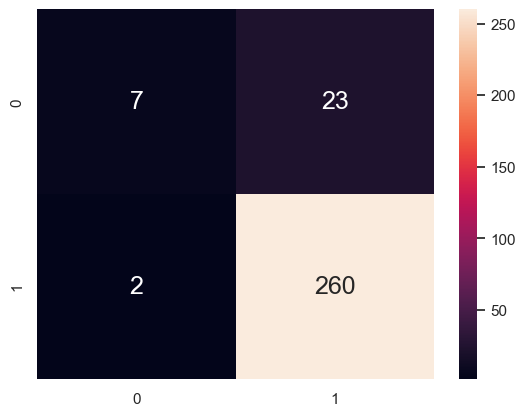

In [24]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = tree_CA_SP_d4.predict(X_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

In [25]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", tree_CA_SP_d4.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.9143835616438356

TPR Test :	 0.9923664122137404
TNR Test :	 0.23333333333333334

FPR Test :	 0.7666666666666667
FNR Test :	 0.007633587786259542


**Observations** : Check the confusion matrices for the two trees and their accuracy metrics above.
- It seems that the max depth 2 tree is slightly worse than the max depth 4 tree on both the training and test sets. This is in terms of Classification Accuracy as well as TPR and FPR metrics. If we want TPR to be the key metric, and want to reduce FPR, max depth 4 tree is doing better on both.
- In some cases, the max depth 4 tree may "overfit" the train set. If so, you will observe its performance is better on train, but not as much on test. However, for me the max depth 4 tree is not too bad. We may try a max depth 3 tree to see how well it performs. Give it a shot if you want!

Overall, I will say the the max depth 4 tree is a better model in my case, as it performs better on both train and test.      
However, in your case, the figures may be different due to random train-test split. Judge accordingly, and justify.

**Important** : Note the huge imbalance in the *False Positives* and *False Negatives* in the confusion matrix. *False Positives* are much higher in number than *False Negatives* in both Train and Test data. This is not surprising -- actually, this is a direct effect of the huge `Y` vs `N` class imbalance in the response variable `CentralAir`. As `CentralAir = Y` was more likely in the data, *False Positives* are more likely too. Think about how you can fix it!     
 
Extra resource : https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

---

## Problem 2 : Predicting CentralAir using Other Variables

Use the other variables from the dataset to predict `CentralAir`, as mentioned in the problem.

### Predicting CentralAir using OverallQual 

Note that we are using `OverallQual` as a numeric variable in this case.    
However, you may convert it to categorical, and try the classification again.

<AxesSubplot:xlabel='OverallQual', ylabel='CentralAir'>

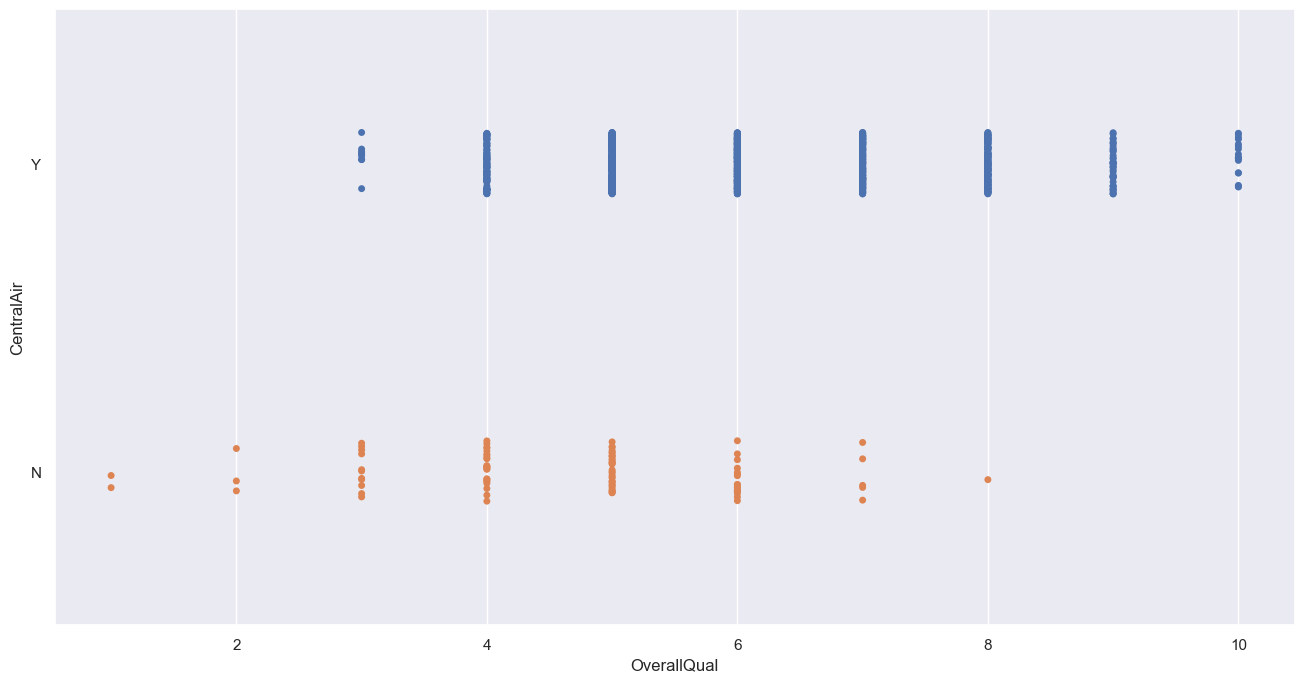

In [26]:
# Plot Response against Predictor to visualize their mutual relationship.
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'OverallQual', y = 'CentralAir', data = houseData)

In [27]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['CentralAir'])
X = pd.DataFrame(houseData['OverallQual'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=4)

[Text(0.4583333333333333, 0.9, 'OverallQual <= 4.5\ngini = 0.12\nsamples = 1168\nvalue = [75, 1093]\nclass = Y'),
 Text(0.25, 0.7, 'OverallQual <= 3.5\ngini = 0.386\nsamples = 111\nvalue = [29, 82]\nclass = Y'),
 Text(0.16666666666666666, 0.5, 'OverallQual <= 2.5\ngini = 0.484\nsamples = 17\nvalue = [10, 7]\nclass = N'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = N'),
 Text(0.25, 0.3, 'gini = 0.5\nsamples = 14\nvalue = [7, 7]\nclass = N'),
 Text(0.3333333333333333, 0.5, 'gini = 0.323\nsamples = 94\nvalue = [19, 75]\nclass = Y'),
 Text(0.6666666666666666, 0.7, 'OverallQual <= 6.5\ngini = 0.083\nsamples = 1057\nvalue = [46, 1011]\nclass = Y'),
 Text(0.5, 0.5, 'OverallQual <= 5.5\ngini = 0.129\nsamples = 607\nvalue = [42, 565]\nclass = Y'),
 Text(0.4166666666666667, 0.3, 'gini = 0.153\nsamples = 312\nvalue = [26, 286]\nclass = Y'),
 Text(0.5833333333333334, 0.3, 'gini = 0.103\nsamples = 295\nvalue = [16, 279]\nclass = Y'),
 Text(0.8333333333333334, 0

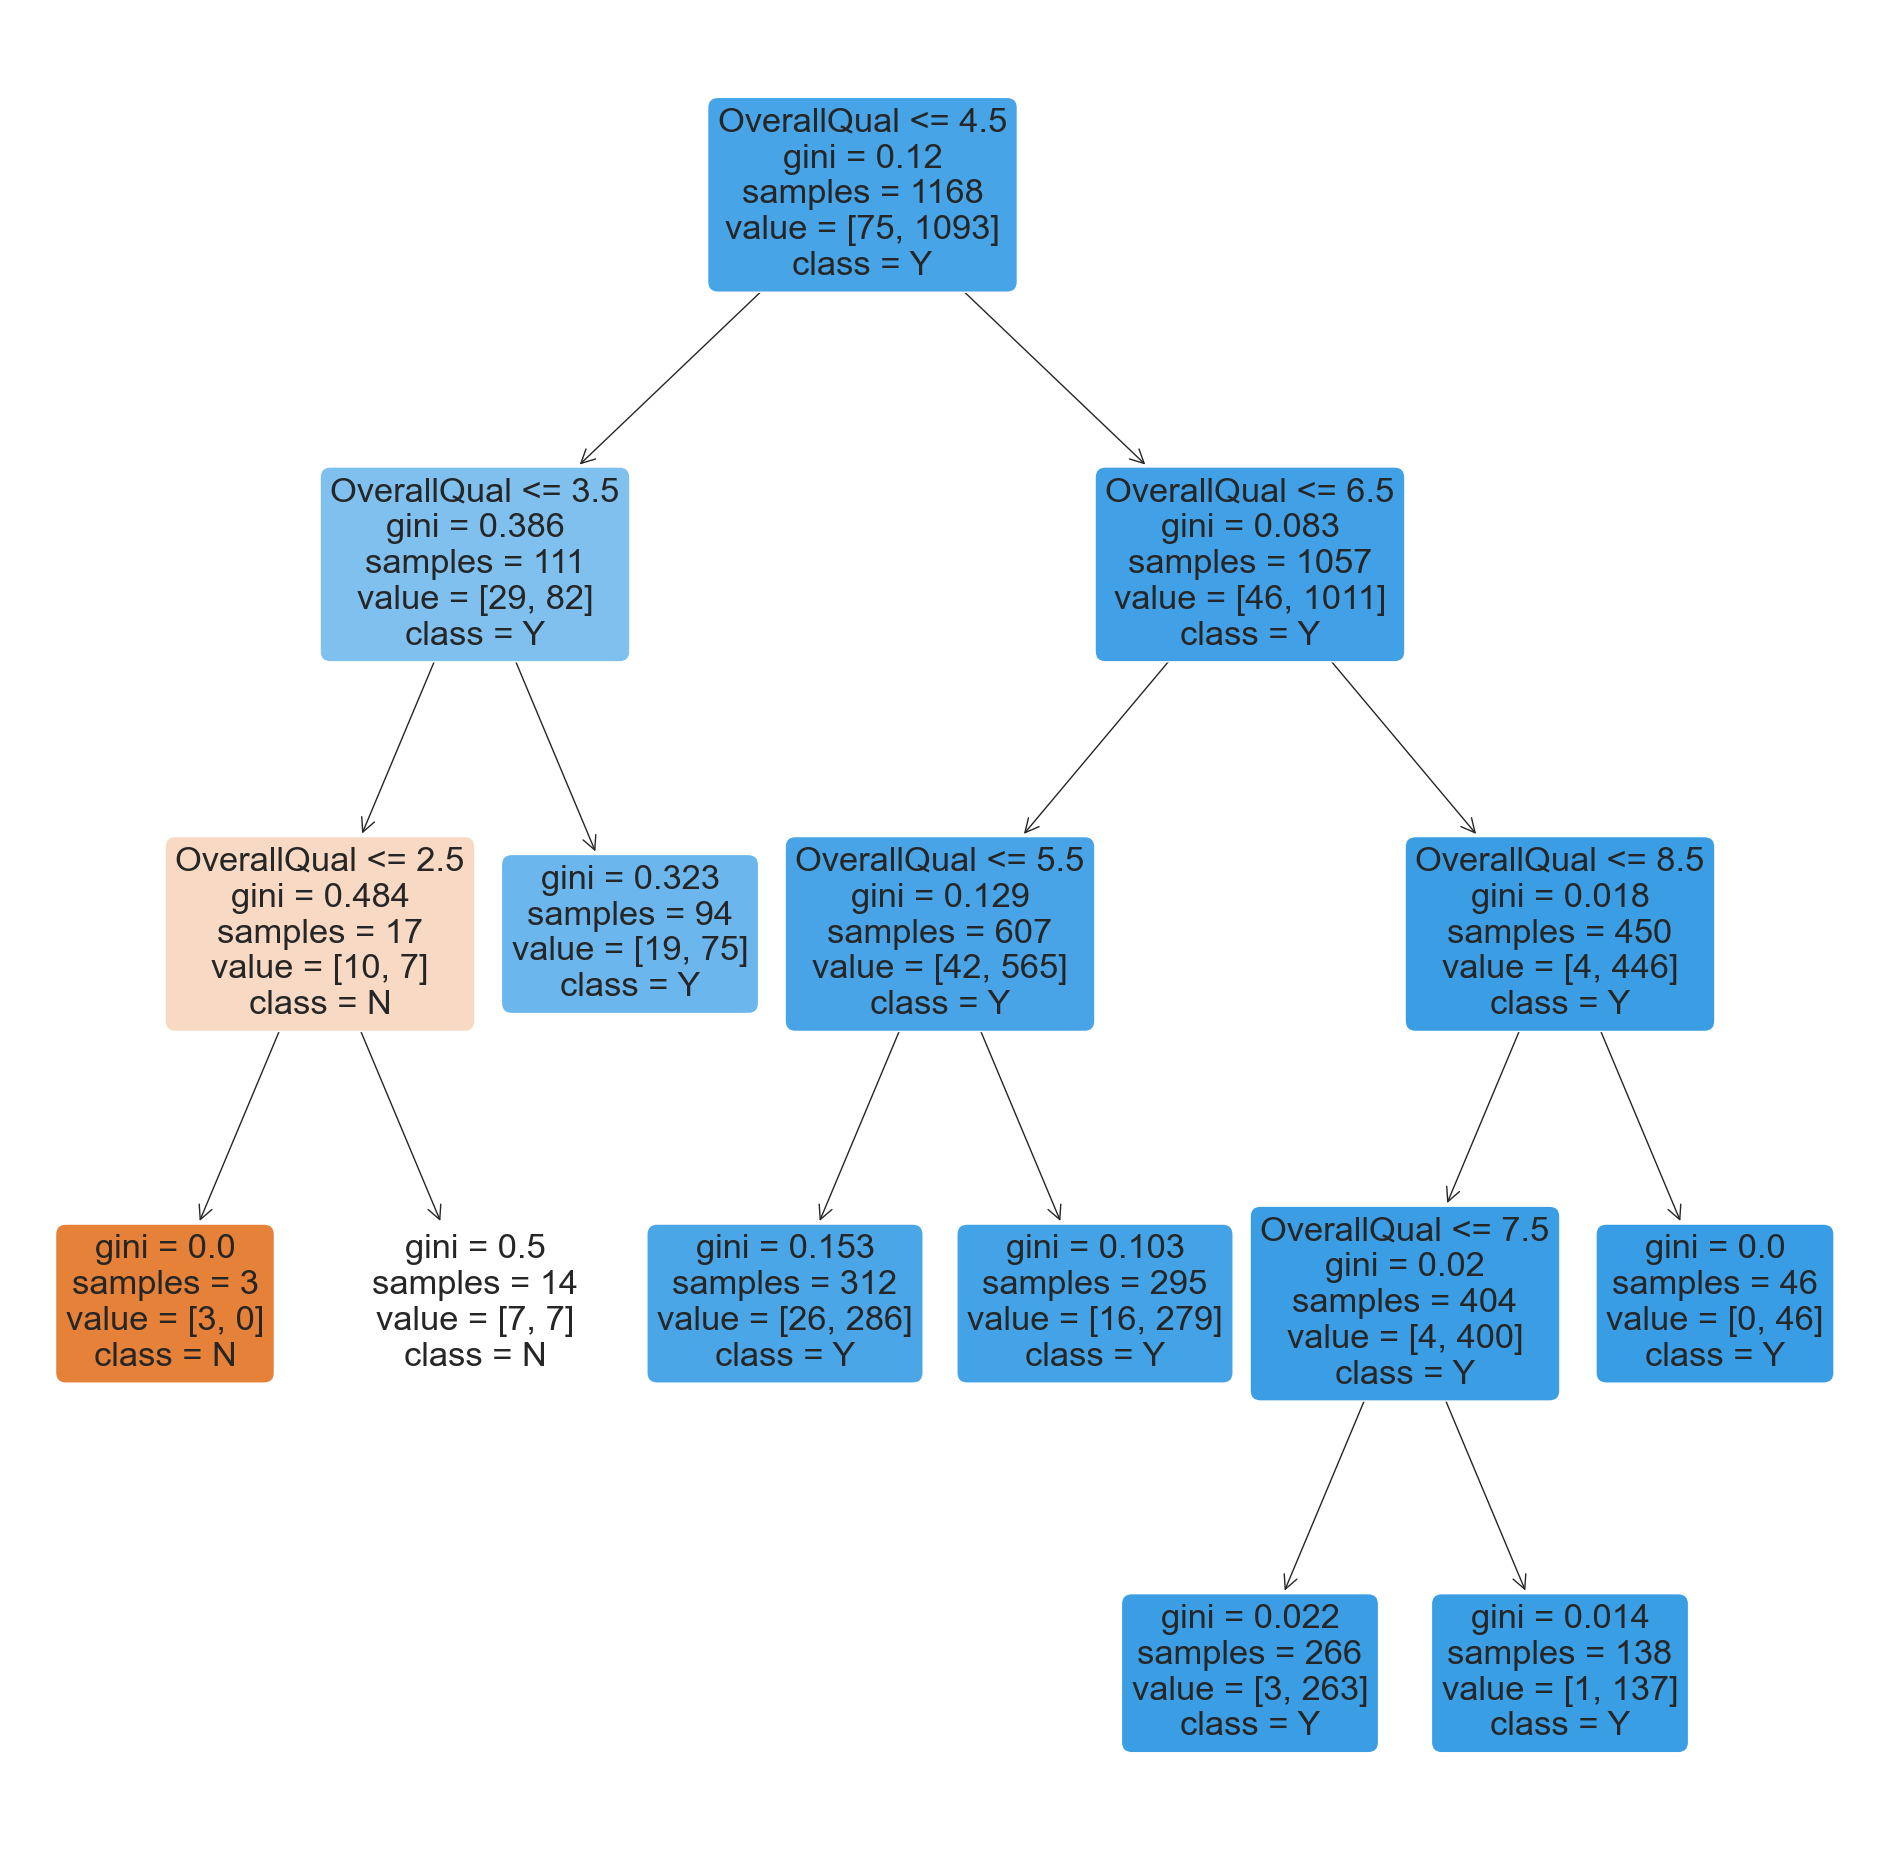

In [28]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.9383561643835616

TPR Train :	 0.9935956084172004
TNR Train :	 0.13333333333333333

FPR Train :	 0.8666666666666667
FNR Train :	 0.006404391582799634


<AxesSubplot:>

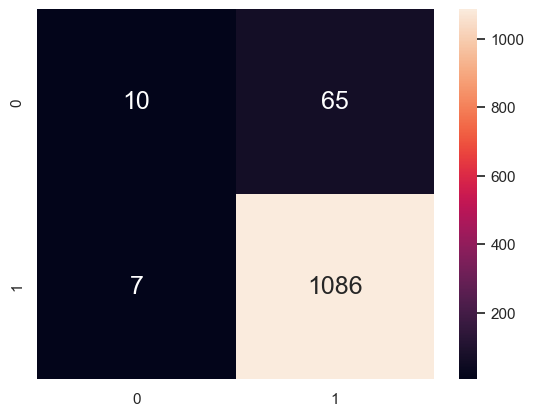

In [29]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9452054794520548

TPR Test :	 0.9926470588235294
TNR Test :	 0.3

FPR Test :	 0.7
FNR Test :	 0.007352941176470588


<AxesSubplot:>

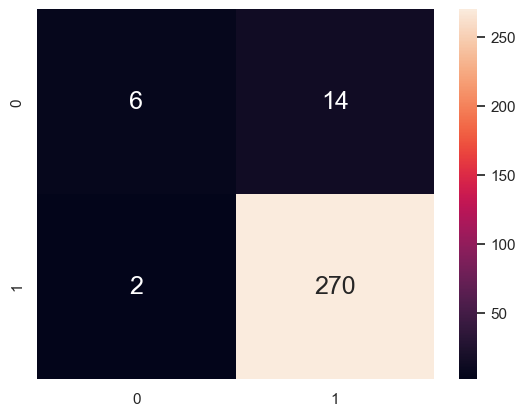

In [30]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Predicting CentralAir using YearBuilt

Note that we are using `YearBuilt` as a numeric variable in this case.    
However, you may use *Building Age* instead, and try the classification.

<AxesSubplot:xlabel='YearBuilt', ylabel='CentralAir'>

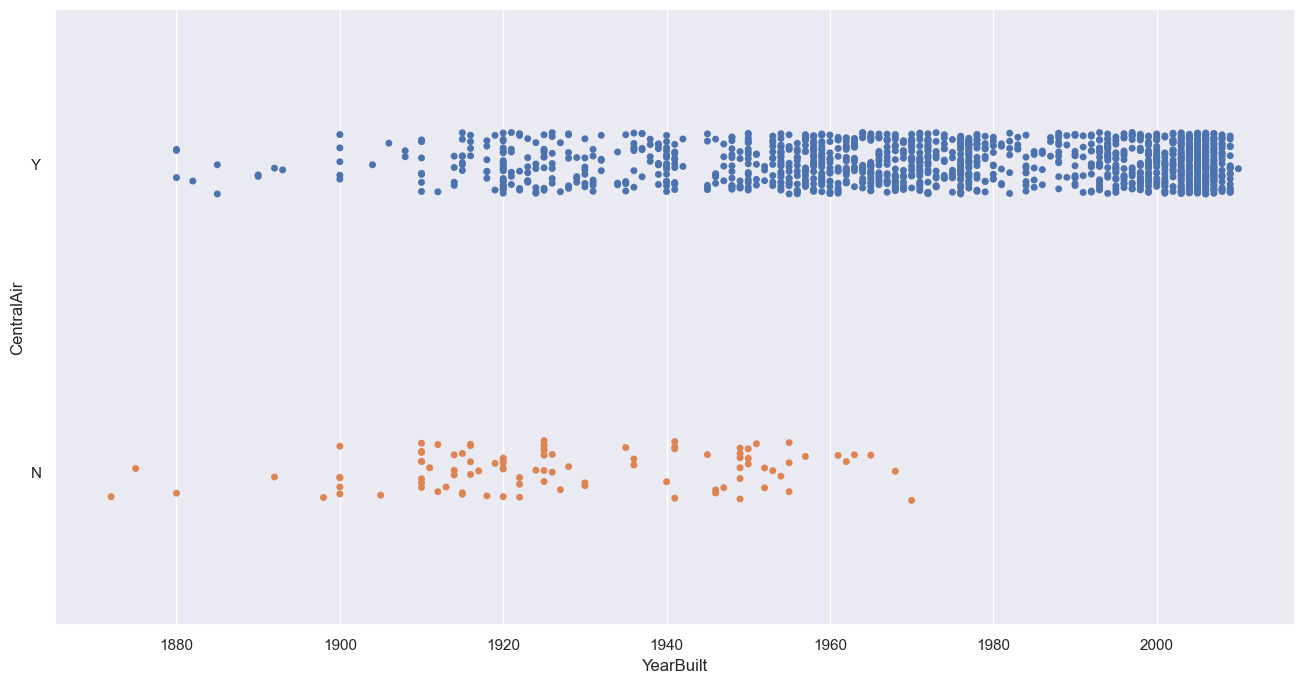

In [31]:
# Plot Response against Predictor to visualize their mutual relationship.
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'YearBuilt', y = 'CentralAir', data = houseData)

In [32]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['CentralAir'])
X = pd.DataFrame(houseData['YearBuilt'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=4)

[Text(0.5340909090909091, 0.9, 'YearBuilt <= 1952.5\ngini = 0.126\nsamples = 1168\nvalue = [79, 1089]\nclass = Y'),
 Text(0.25, 0.7, 'YearBuilt <= 1917.5\ngini = 0.373\nsamples = 278\nvalue = [69, 209]\nclass = Y'),
 Text(0.09090909090909091, 0.5, 'YearBuilt <= 1877.5\ngini = 0.498\nsamples = 60\nvalue = [28, 32]\nclass = Y'),
 Text(0.045454545454545456, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = N'),
 Text(0.13636363636363635, 0.3, 'YearBuilt <= 1891.0\ngini = 0.495\nsamples = 58\nvalue = [26, 32]\nclass = Y'),
 Text(0.09090909090909091, 0.1, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = Y'),
 Text(0.18181818181818182, 0.1, 'gini = 0.5\nsamples = 51\nvalue = [25, 26]\nclass = Y'),
 Text(0.4090909090909091, 0.5, 'YearBuilt <= 1948.5\ngini = 0.305\nsamples = 218\nvalue = [41, 177]\nclass = Y'),
 Text(0.3181818181818182, 0.3, 'YearBuilt <= 1930.5\ngini = 0.268\nsamples = 182\nvalue = [29, 153]\nclass = Y'),
 Text(0.2727272727272727, 0.1, 'gini = 0.332\nsamples = 95\nval

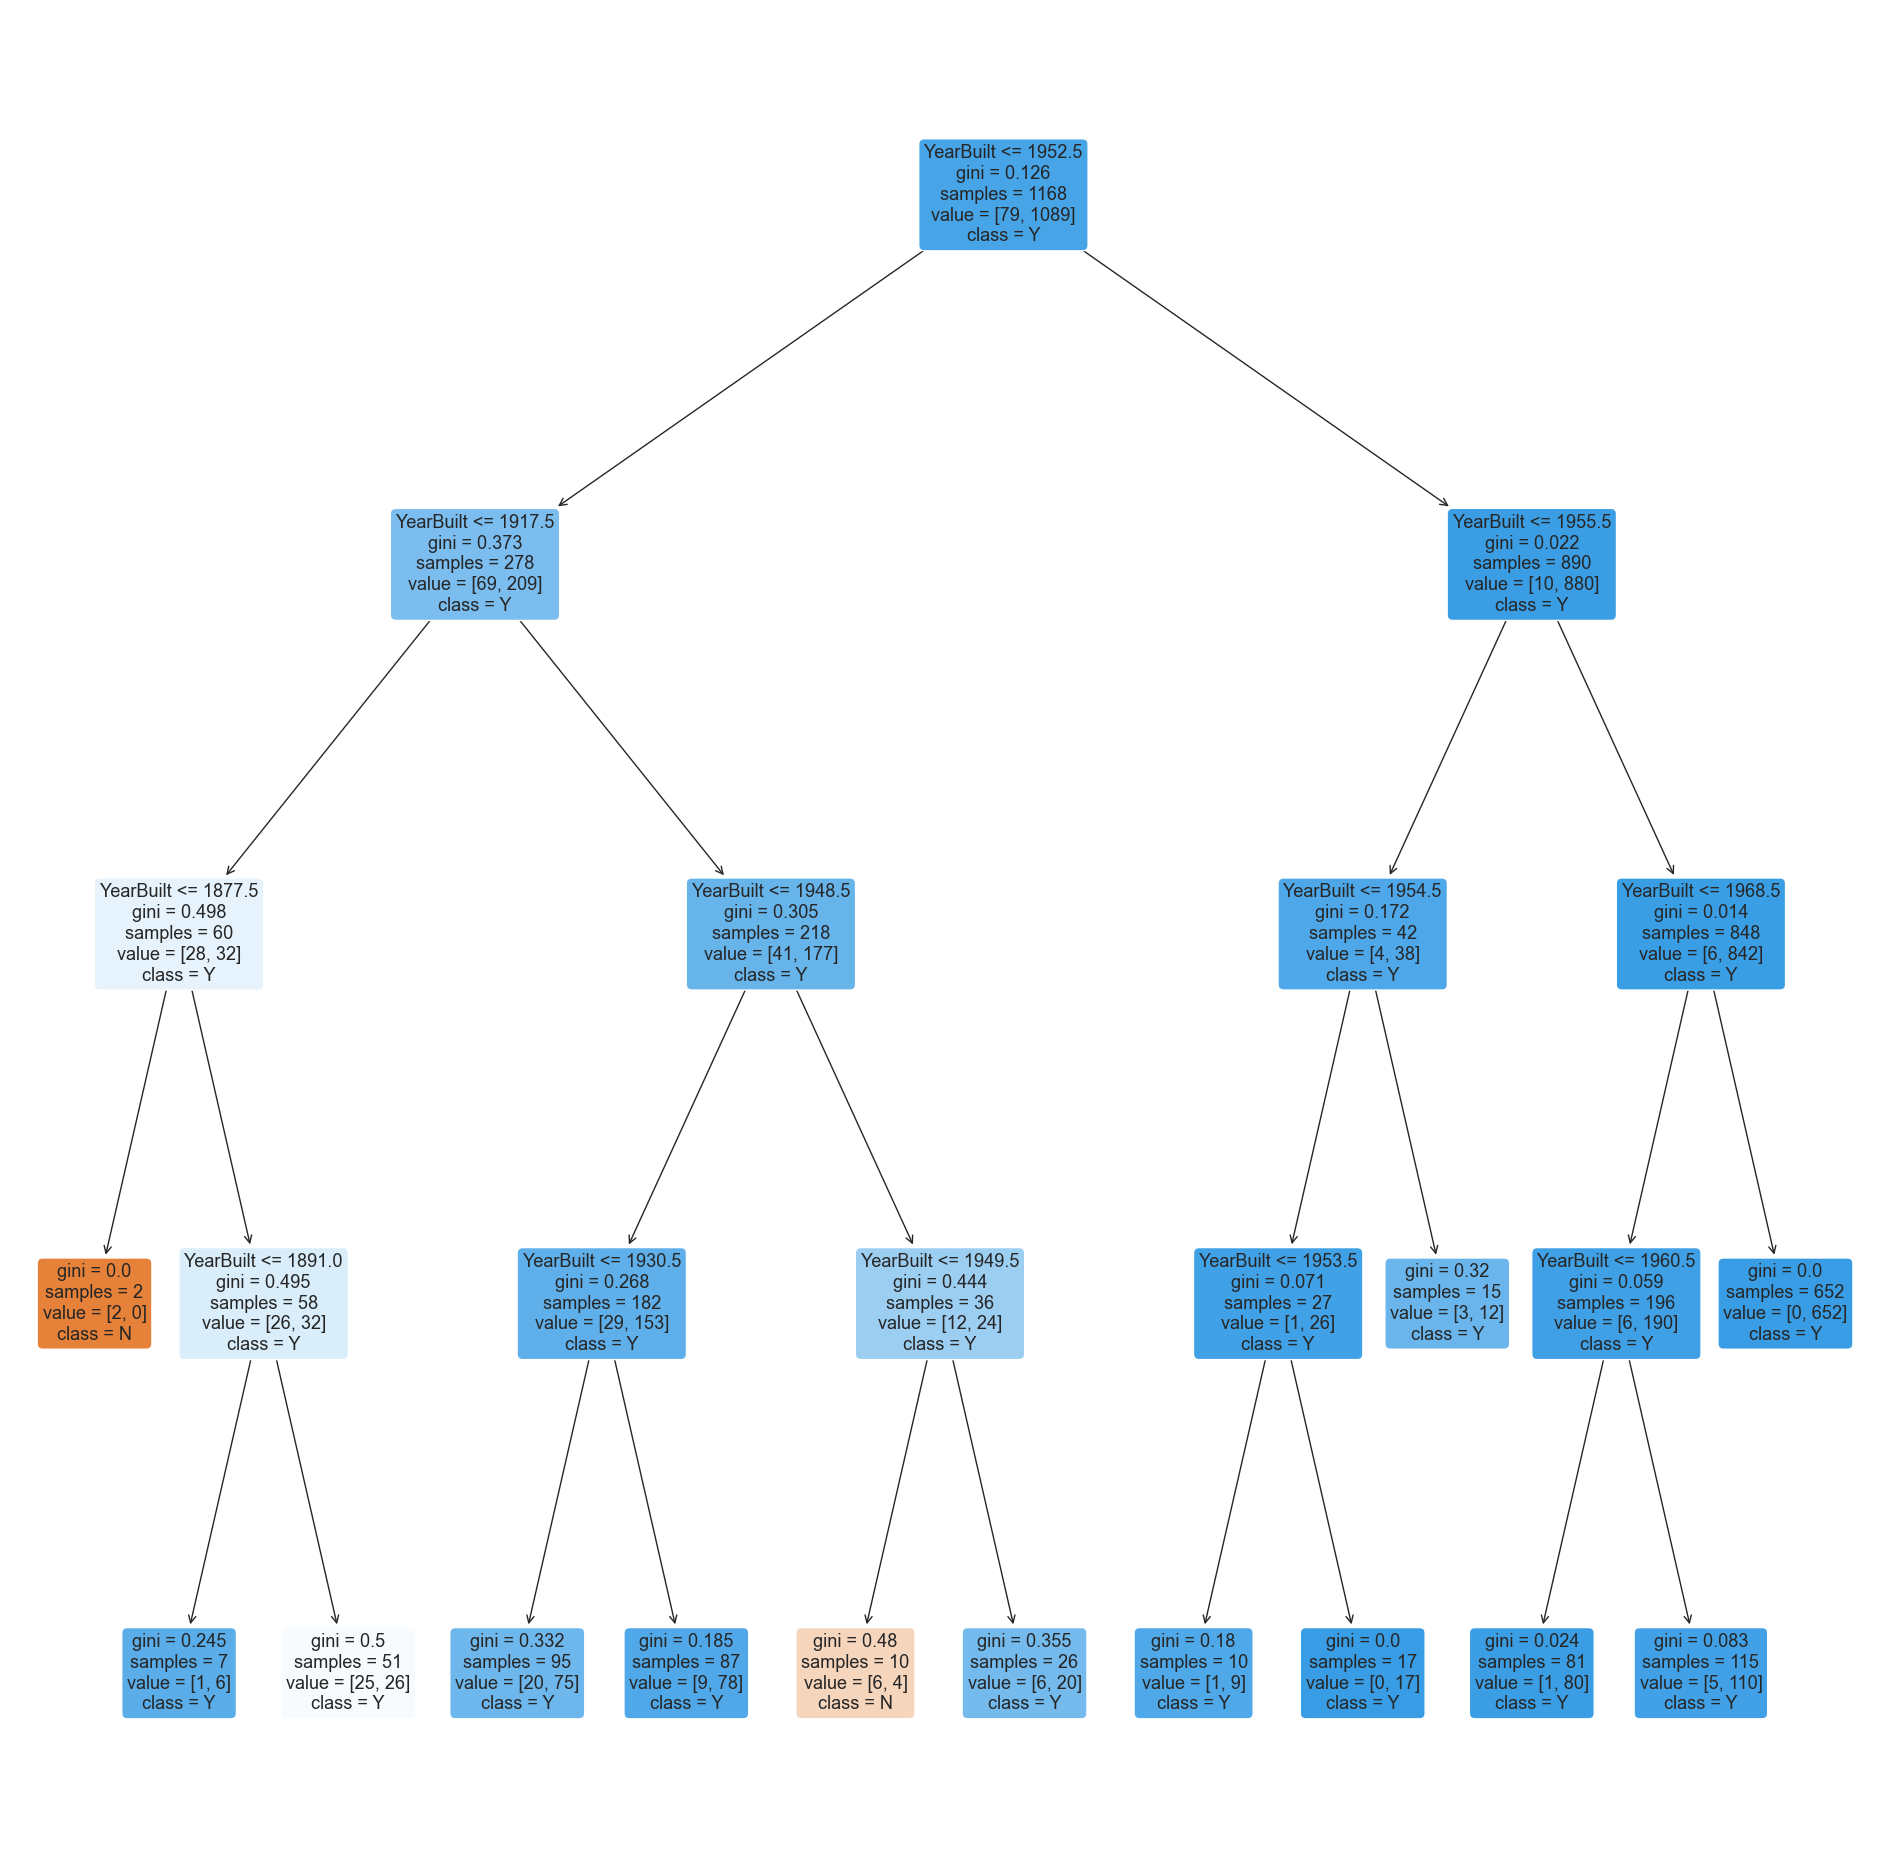

In [33]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.9357876712328768

TPR Train :	 0.9963269054178145
TNR Train :	 0.10126582278481013

FPR Train :	 0.8987341772151899
FNR Train :	 0.0036730945821854912


<AxesSubplot:>

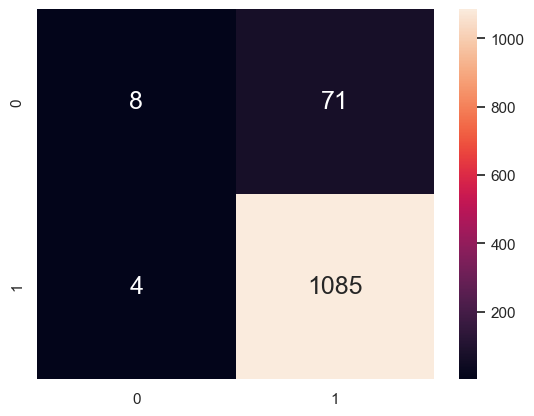

In [34]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9383561643835616

TPR Test :	 0.9927536231884058
TNR Test :	 0.0

FPR Test :	 1.0
FNR Test :	 0.007246376811594203


<AxesSubplot:>

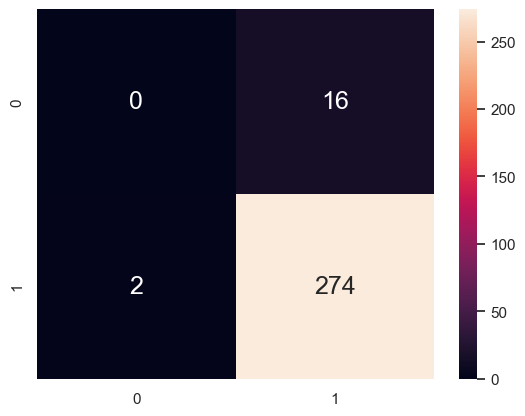

In [35]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

**Observation** : In my case, `OverallQual` seems worse than `YearBuilt`. However, both the variables are worse compared to `SalePrice` in terms of Classification Accuracy (higher on train and test are better) as well as TPR (higher on train and test are better) and FPR (lower on train and test are better). 

It is worth mentioning at this point that all three variables seem pretty bad in predicting `CentralAir`. 
- It may be because of the "class imbalance" issue we hinted above, but we will need to fix that first to check if we get any better results. Try if you want.
- It may also happen because the variables are particularly bad uni-variate predictors. In that case, we need to try out with other variables in the dataset, or even try a multi-variate decision tree to get better results. Give these ideas a shot -- try a multi-variate decision tree with the three variales together.

**Did you notice?** : Go back and check again all accuracy figures for the four models. I am pretty sure you did not get the exact same values as I did. This is due to the random selection of Train-Test sets. In fact, if you run the above cells again, you will get a different set of accuracy figures. If that is so, can we really be confident that `SalePrice` will always be the best variable to predict `CentralAir`? Think about it. ;-)

---

## Problem 3 : Understanding the Misclassified Samples

Recall and print the max depth 4 decision tree from Problem 1, as required in this case. Note that I am fitting the model once again, just to keep everything together. You may simply use the model you fit earlier directly in case of this problem. As I fit it again, the tree will change slightly from Problem 1.

In [36]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
# you can change the max_depth as you wish

# Decision Tree with max depth = 4
tree_CA_SP_d4 = DecisionTreeClassifier(max_depth = 4)

In [37]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['CentralAir'])
X = pd.DataFrame(houseData['SalePrice'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


Fit Decision Tree Classifier models on the Train Dataset.   

In [38]:
# Fit the tree with max depth 4
tree_CA_SP_d4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.4791666666666667, 0.9, 'SalePrice <= 107700.0\ngini = 0.116\nsamples = 1168\nvalue = [72, 1096]\nclass = Y'),
 Text(0.22916666666666666, 0.7, 'SalePrice <= 61691.5\ngini = 0.468\nsamples = 123\nvalue = [46, 77]\nclass = Y'),
 Text(0.125, 0.5, 'SalePrice <= 52250.0\ngini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = N'),
 Text(0.08333333333333333, 0.3, 'SalePrice <= 46000.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = N'),
 Text(0.041666666666666664, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = N'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = N'),
 Text(0.3333333333333333, 0.5, 'SalePrice <= 98750.0\ngini = 0.432\nsamples = 111\nvalue = [35, 76]\nclass = Y'),
 Text(0.25, 0.3, 'SalePrice <= 97750.0\ngini = 0.461\nsamples = 75\nvalue = [27, 48]\nclass = Y'),
 Text(0.20833333333333334, 0.1, 'gini = 0.444\nsamples = 72\nvalue = [24, 48]\nclass = Y'),
 Tex

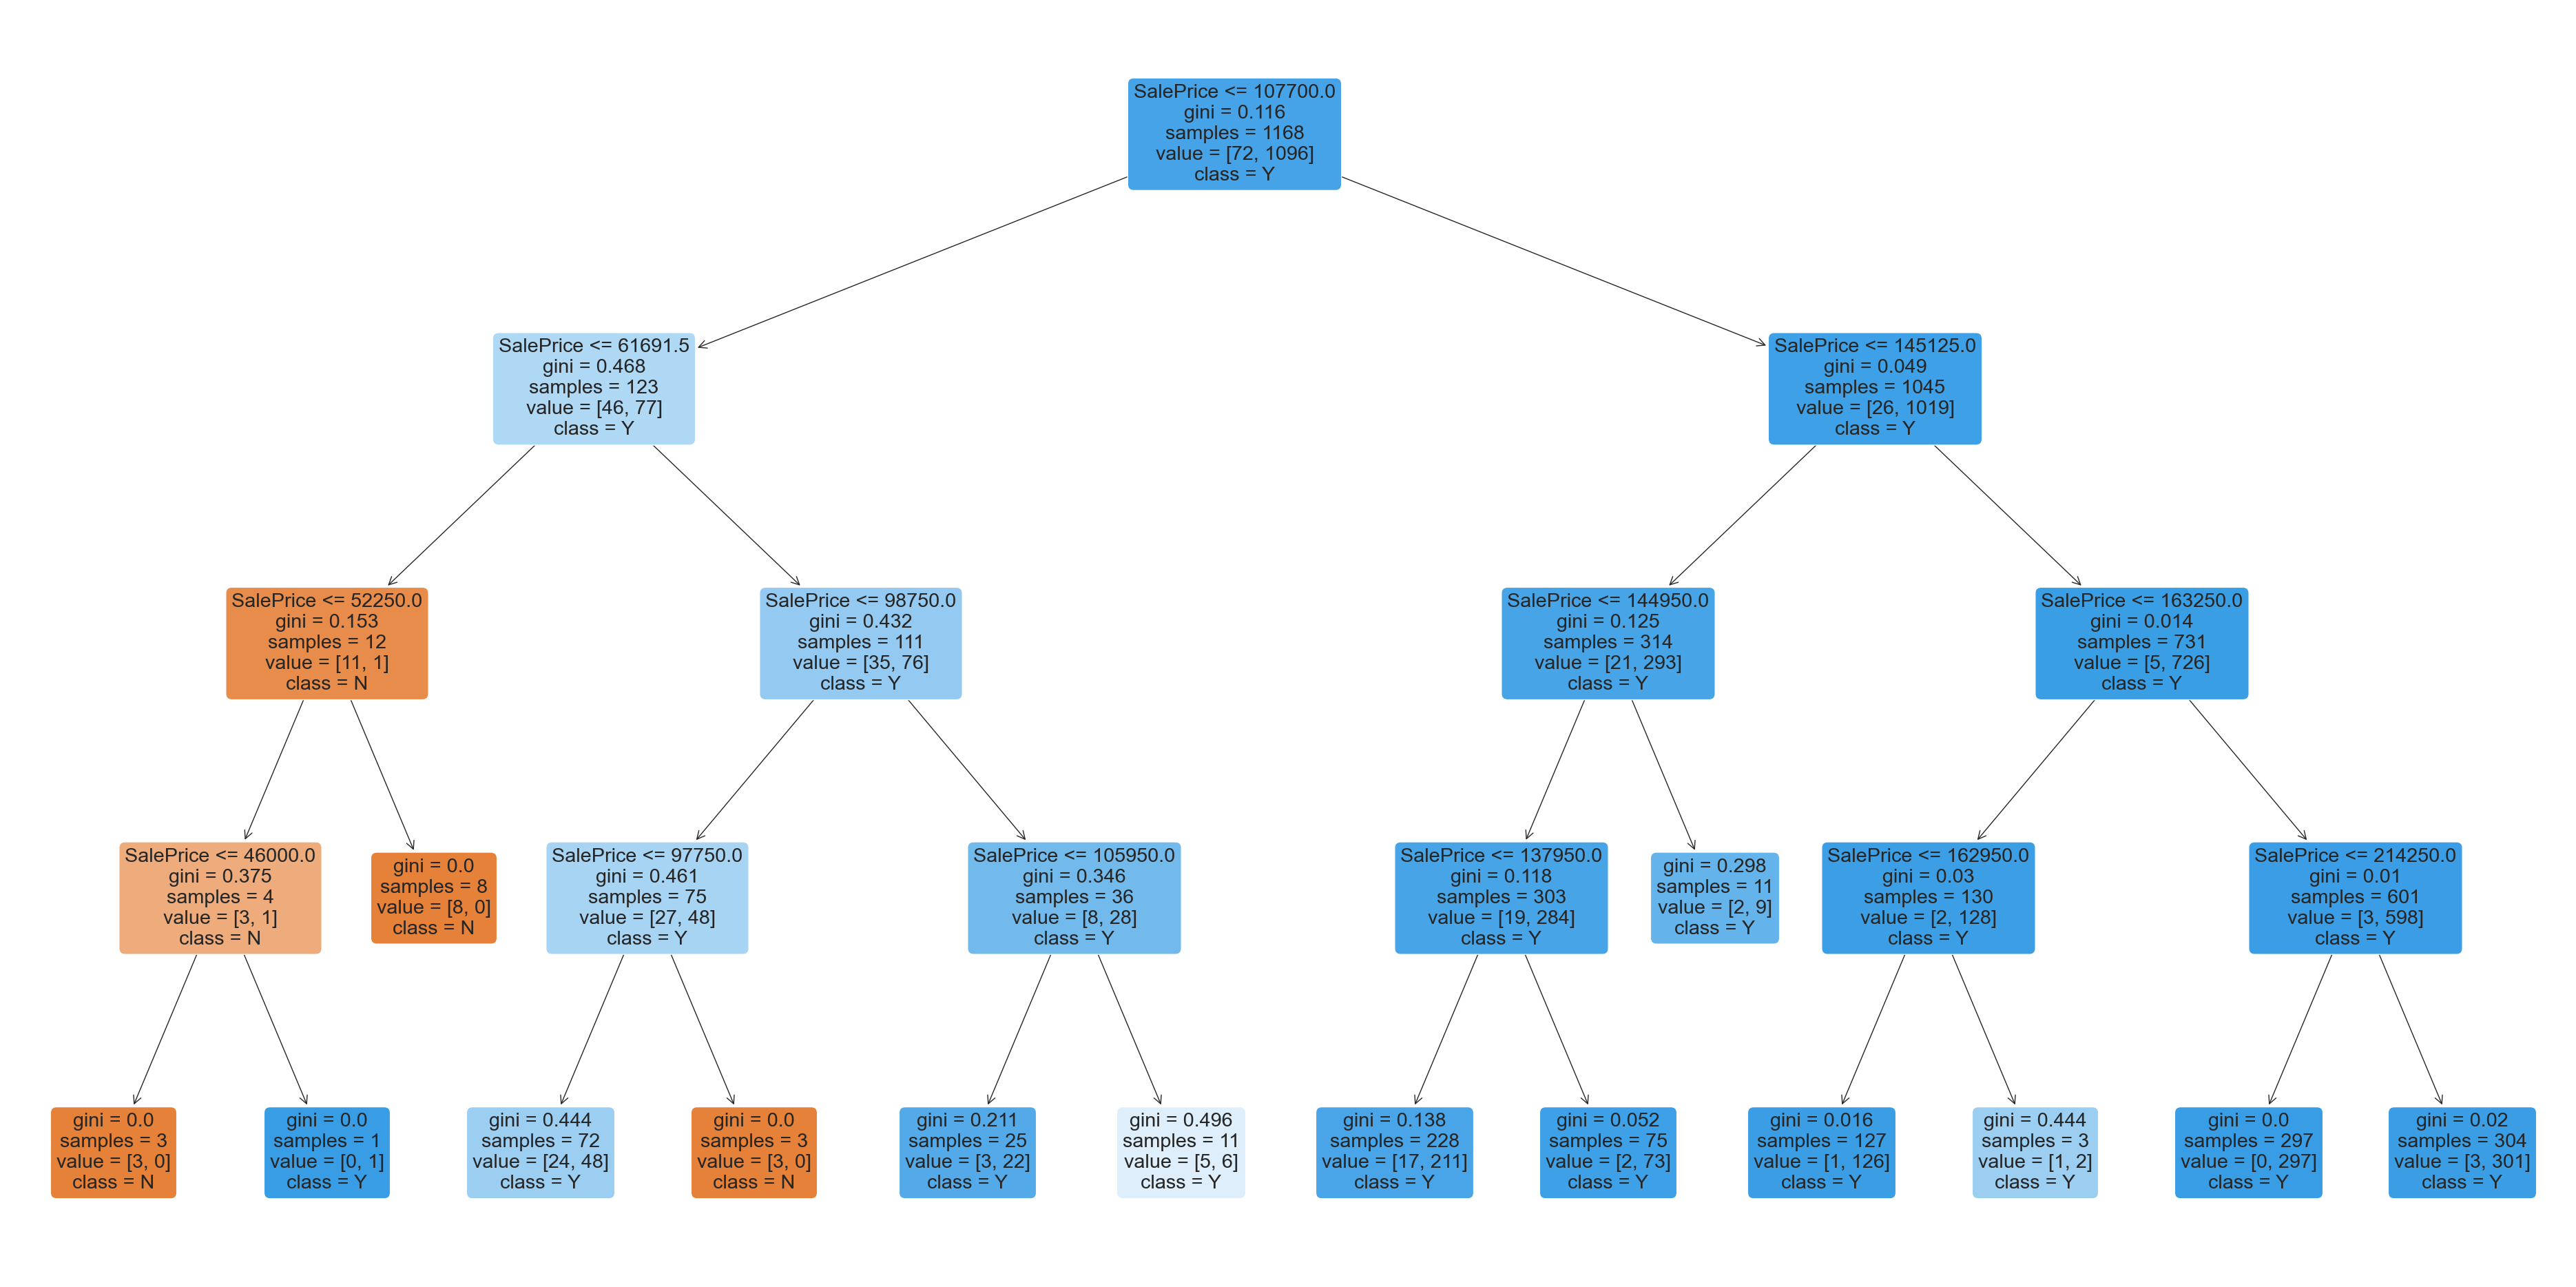

In [39]:
# Plot the tree with max depth 4
from sklearn.tree import plot_tree

f = plt.figure(figsize=(48,24))
plot_tree(tree_CA_SP_d4, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

**Observation** : Take a close look at the tree you printed above (open the image in a new tab, or download the image for a closer inspection, if needed).    
- class = Y means Positive, or CentralAir = True. Thus, False Positive will mean the Negative (CentralAir = False) cases that end up in a leaf node that predicts class = Y. We do not need to look at nodes that predict class = N.
- In any leaf node that predicts class = Y, the first number is the bracket counts the Negative samples, and the second number counts the Positive samples. Example : first leaf node at level 4 has 0 Negatives and 1 Positive.
- Thus, we only need to take a look at the leaf nodes that predict class = Y (blue in color), and within those nodes, we only need to check the first number to know the Negatives classified as Y, that is, the False Positives.

In my case, as above, the blue leaf node (class = Y) that has the highest first number (FP) is the third leaf at level 4. It has 78 data points (samples) in it, with 28 Negatives and 50 Positives. However, as the class = Y prediction is Positive, those 28 Negatives are predicted wrongly as Positives. Thus, there are 28 False Positives in this leaf node, the highest in my tree. Now, I need to fetch these 78 data points (rows) from the dataset that end up in this leaf node.

**Filtering the Data Points (rows)** : To fetch the 78 data points (rows) that end up in this leaf node, check the tree again, but now, in terms of the splits that reach us from the root node down to the target leaf node. We see the following by studying the path from root node to the target leaf node in the tree:
- First split at root is `SalePrice` <= 107700.0, as we go towards the left branch of the tree.
- Second split at level 1 is `SalePrice` > 61691.5 as we go towards the right branch at this level.
- Third split at level 2 is `SalePrice` <= 98150.0 as we go towards the left branch at this level.
- Fourth split at level 3 is `SalePrice` <= 97750.0 as we go towards the right branch at this stage.     

Overall, the splits combined, our filtering logic to reach the target leaf node is 61691.5 < `SalePrice` <= 97750. Let's use it to filter the dataset.

In [40]:
# Combine the training dataset
train_set = X_train.join(y_train).reindex(X_train.index)

# Check the train_set quickly
print("Train set :", train_set.shape)
print("CentralAir in Train Set")
print(train_set["CentralAir"].value_counts())

Train set : (1168, 2)
CentralAir in Train Set
Y    1096
N      72
Name: CentralAir, dtype: int64


In [41]:
# Filter to the target leaf node
filter_rule = (61691.5 < train_set["SalePrice"]) & (train_set["SalePrice"] <= 97750)
filter_set = train_set[filter_rule]

# Check the data points after filter
print("Filtered set :", filter_set.shape)
print("CentralAir in the Leaf Node")
print(filter_set["CentralAir"].value_counts())

Filtered set : (72, 2)
CentralAir in the Leaf Node
Y    48
N    24
Name: CentralAir, dtype: int64


Note that we have the correct leaf node as the number of samples match exactly with our diagram above : 28 N, 50 Y.    
Extracting just the False Positive cases from this node is now trivial, as they are the samples with `CentralAir = N`.

In [42]:
# Extract the False Positives
fp_set = filter_set[filter_set['CentralAir'] == 'N']
fp_set

,SalePrice,CentralAir
329,78000,N
998,91000,N
383,76000,N
1090,92900,N
912,88000,N
821,93000,N
125,84500,N
325,87000,N
155,79000,N
1000,82000,N


**Note** : Yup, this is a particularly tricky and tedious problem to solve. The purpose is NOT to just learn the Python way of handling these things (as I said earlier, this is not a programming course), but to understand the exact details of a DecisionTree, and how to read it. Hope this makes better sense now.

---

## Extra : Predicting CentralAir using All Variables

Use all three variables from this exercise to predict `CentralAir`.     

In [43]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(houseData['CentralAir'])
X = pd.DataFrame(houseData[['SalePrice', 'OverallQual', 'YearBuilt']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=4)

[Text(0.44, 0.9, 'SalePrice <= 107700.0\ngini = 0.122\nsamples = 1168\nvalue = [76, 1092]\nclass = Y'),
 Text(0.2, 0.7, 'YearBuilt <= 1953.0\ngini = 0.461\nsamples = 125\nvalue = [45, 80]\nclass = Y'),
 Text(0.08, 0.5, 'SalePrice <= 62750.0\ngini = 0.5\nsamples = 84\nvalue = [43, 41]\nclass = N'),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = N'),
 Text(0.12, 0.3, 'YearBuilt <= 1918.0\ngini = 0.496\nsamples = 75\nvalue = [34, 41]\nclass = Y'),
 Text(0.08, 0.1, 'gini = 0.415\nsamples = 17\nvalue = [12, 5]\nclass = N'),
 Text(0.16, 0.1, 'gini = 0.471\nsamples = 58\nvalue = [22, 36]\nclass = Y'),
 Text(0.32, 0.5, 'YearBuilt <= 1965.5\ngini = 0.093\nsamples = 41\nvalue = [2, 39]\nclass = Y'),
 Text(0.28, 0.3, 'YearBuilt <= 1956.5\ngini = 0.245\nsamples = 14\nvalue = [2, 12]\nclass = Y'),
 Text(0.24, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Y'),
 Text(0.32, 0.1, 'gini = 0.346\nsamples = 9\nvalue = [2, 7]\nclass = Y'),
 Text(0.36, 0.3, 'gini = 0.0\nsamples 

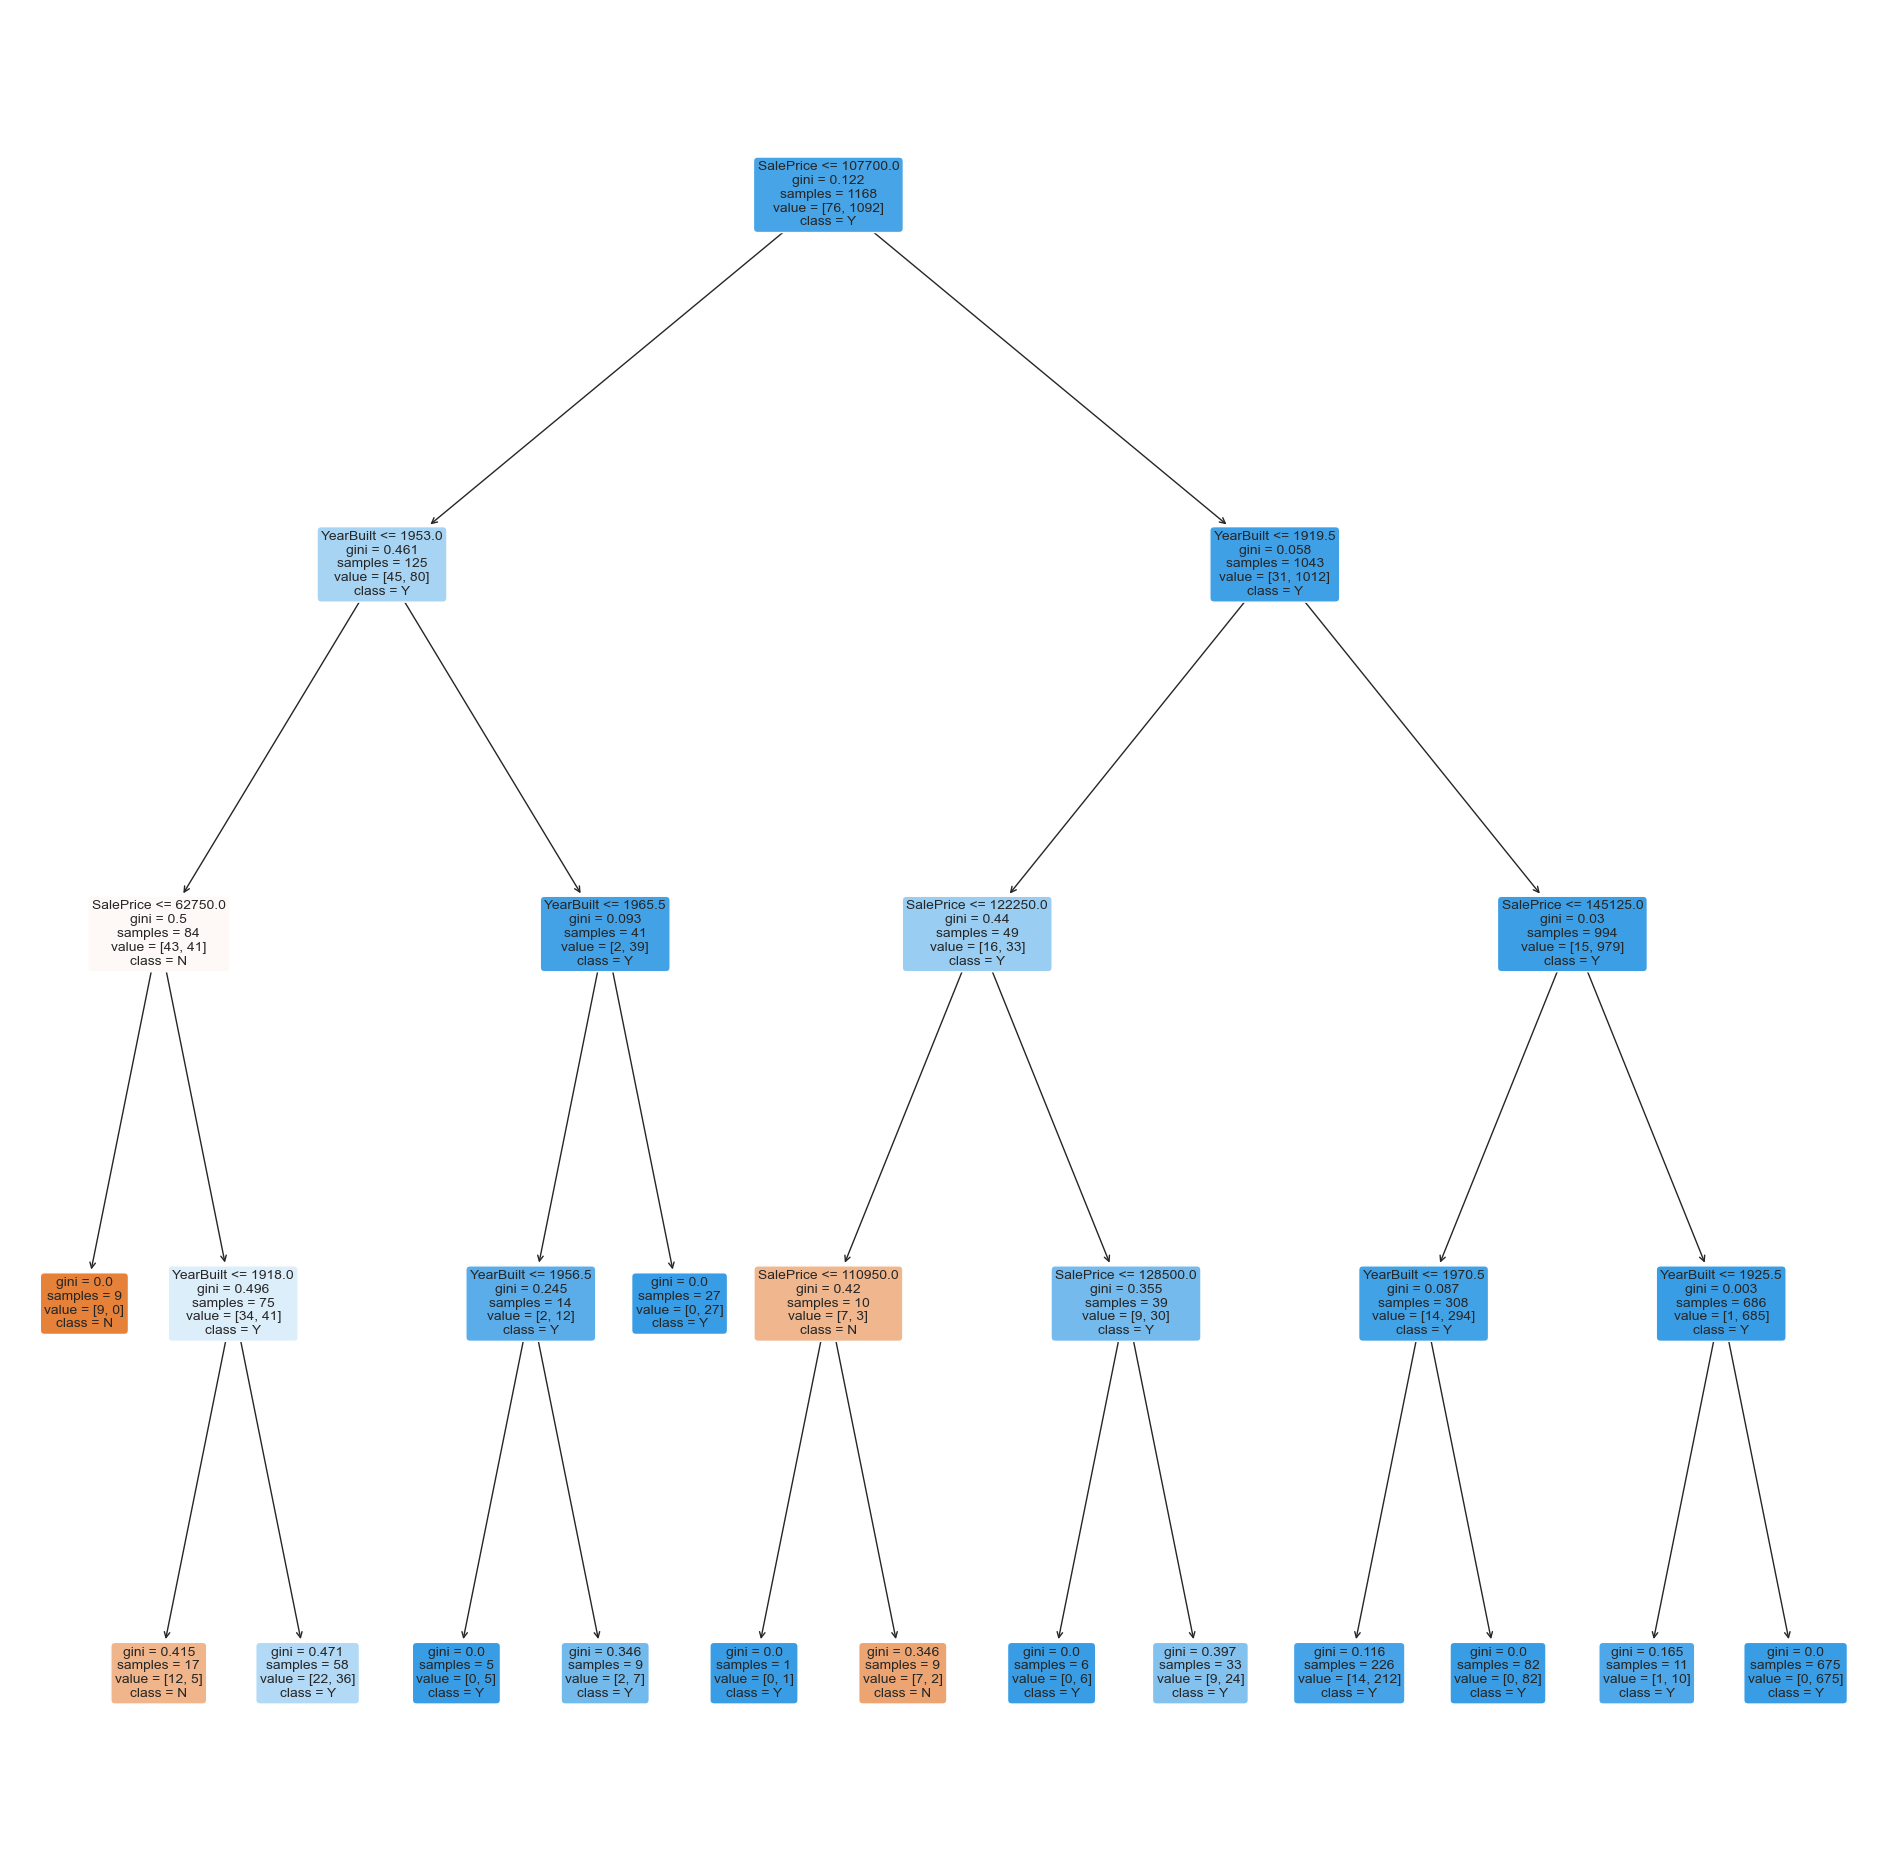

In [44]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.9529109589041096

TPR Train :	 0.9935897435897436
TNR Train :	 0.3684210526315789

FPR Train :	 0.631578947368421
FNR Train :	 0.00641025641025641


<AxesSubplot:>

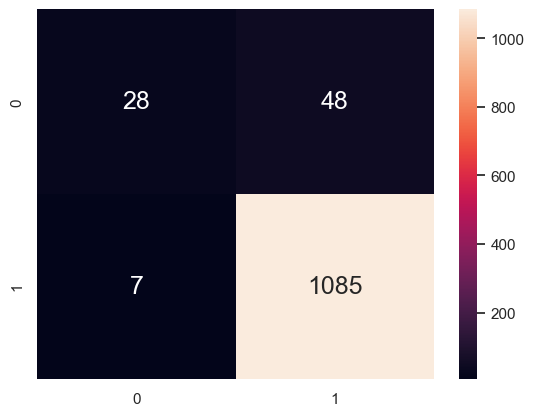

In [45]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9246575342465754

TPR Test :	 0.9706959706959707
TNR Test :	 0.2631578947368421

FPR Test :	 0.7368421052631579
FNR Test :	 0.029304029304029304


<AxesSubplot:>

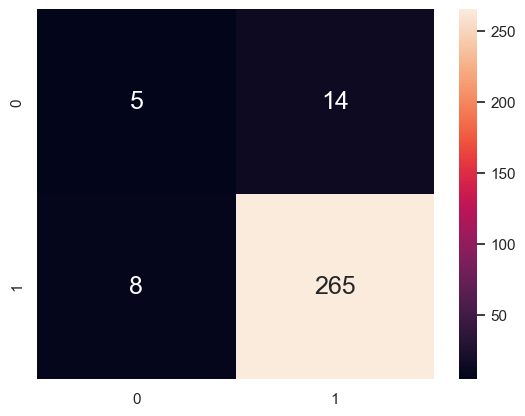

In [46]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

**Observation :** The model with `CentralAir` against all the three variables `SalePrice`, `OverallQual`, `YearBuilt` is slightly better, but not necessarily much better. That's strange! However, there is also room to play with the `max_depth` of the Decision Tree. Try other values and check out.

Experiment with `max_depth` of the Decision Tree to check the variations in accuracy and confusion matrix for train and test. Think about it!

[Text(0.5, 0.875, 'SalePrice <= 107700.0\ngini = 0.12\nsamples = 1168\nvalue = [75, 1093]\nclass = Y'),
 Text(0.25, 0.625, 'YearBuilt <= 1953.0\ngini = 0.47\nsamples = 127\nvalue = [48, 79]\nclass = Y'),
 Text(0.125, 0.375, 'SalePrice <= 62250.0\ngini = 0.499\nsamples = 91\nvalue = [47, 44]\nclass = N'),
 Text(0.0625, 0.125, 'gini = 0.165\nsamples = 11\nvalue = [10, 1]\nclass = N'),
 Text(0.1875, 0.125, 'gini = 0.497\nsamples = 80\nvalue = [37, 43]\nclass = Y'),
 Text(0.375, 0.375, 'YearBuilt <= 1958.0\ngini = 0.054\nsamples = 36\nvalue = [1, 35]\nclass = Y'),
 Text(0.3125, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = Y'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]\nclass = Y'),
 Text(0.75, 0.625, 'YearBuilt <= 1917.5\ngini = 0.051\nsamples = 1041\nvalue = [27, 1014]\nclass = Y'),
 Text(0.625, 0.375, 'OverallQual <= 5.5\ngini = 0.462\nsamples = 47\nvalue = [17, 30]\nclass = Y'),
 Text(0.5625, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass 

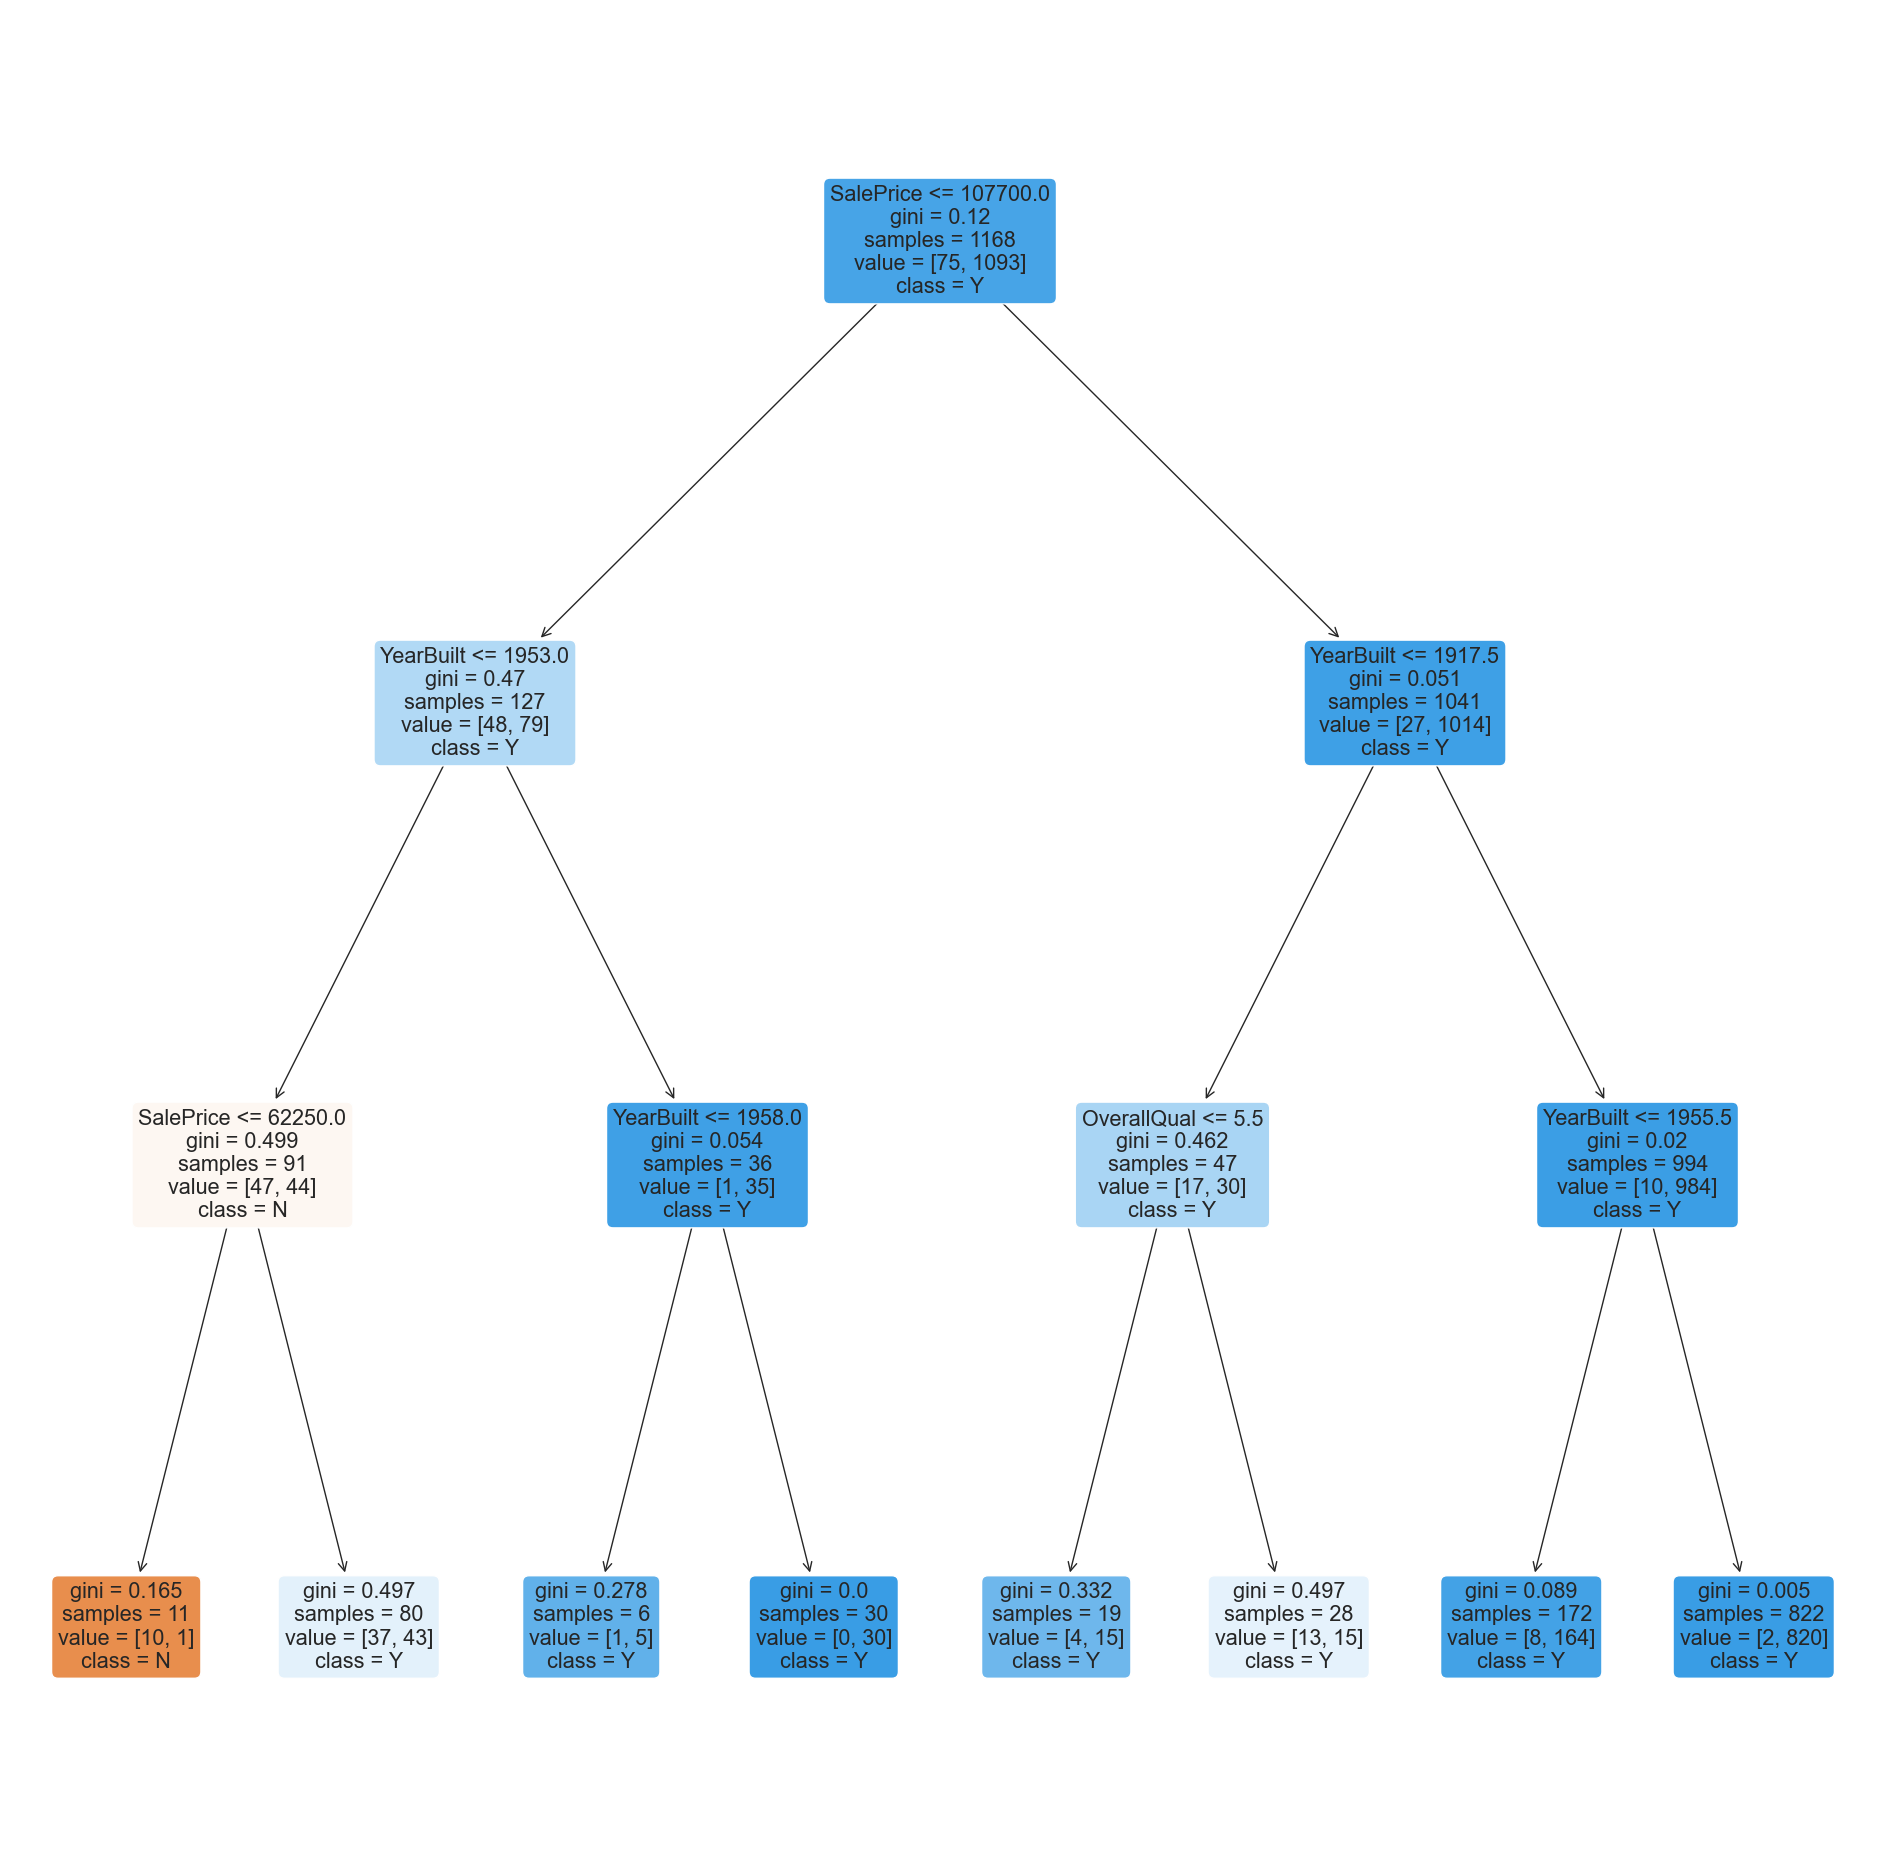

In [47]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(houseData['CentralAir'])
X = pd.DataFrame(houseData[['SalePrice', 'OverallQual', 'YearBuilt']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # CHANGE IT HERE AND EXPERIMENT
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.9434931506849316

TPR Train :	 0.9990850869167429
TNR Train :	 0.13333333333333333

FPR Train :	 0.8666666666666667
FNR Train :	 0.0009149130832570906


<AxesSubplot:>

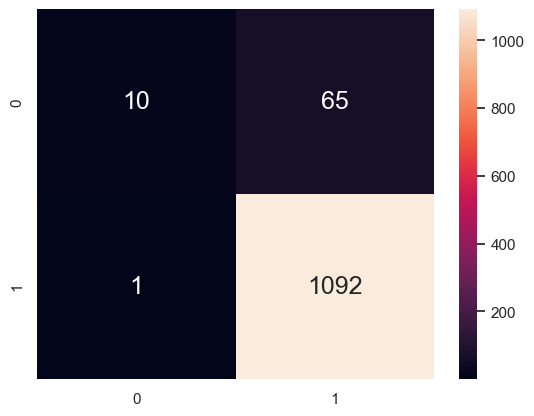

In [48]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9417808219178082

TPR Test :	 1.0
TNR Test :	 0.15

FPR Test :	 0.85
FNR Test :	 0.0


<AxesSubplot:>

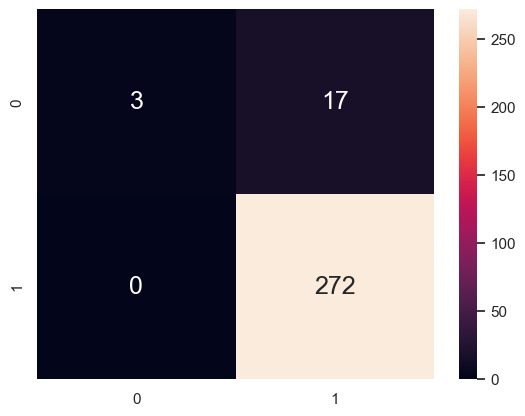

In [49]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})